In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('Credit-Scores.csv')
df.head()

C:\Users\power\AppData\Local\Temp\ipykernel_12204\2496456897.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Credit-Scores.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.shape

(100000, 28)

In [4]:
df.drop(['ID','Customer_ID','Month','Name'],axis=1,inplace=True)
df.head()

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.shape

(100000, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   SSN                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [7]:
df['Annual_Income']

0         19114.12
1         19114.12
2         19114.12
3         19114.12
4         19114.12
           ...    
99995     39628.99
99996     39628.99
99997     39628.99
99998     39628.99
99999    39628.99_
Name: Annual_Income, Length: 100000, dtype: object

In [8]:
df['Annual_Income'].dtype

dtype('O')

In [9]:
df['Annual_Income']=pd.to_numeric(df['Annual_Income'],errors='coerce')

In [10]:
df['Annual_Income'].dtype

dtype('float64')

In [11]:
df['Annual_Income']

0        19114.12
1        19114.12
2        19114.12
3        19114.12
4        19114.12
           ...   
99995    39628.99
99996    39628.99
99997    39628.99
99998    39628.99
99999         NaN
Name: Annual_Income, Length: 100000, dtype: float64

In [12]:
df['Age']

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [13]:
df['Age'].dtype

dtype('O')

In [14]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce')

In [15]:
df['Age']

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [16]:
df['Age'].dtype

dtype('float64')

In [17]:
df['Age'].nunique()

1661

In [18]:
df[df['Age']==-500]

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,-500.0,821-00-0265,Scientist,19114.120,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
113,-500.0,655-05-7666,Entrepreneur,25546.260,NaN,8,7,14,5,"Not Specified, Student Loan, Student Loan, Cre...",...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
289,-500.0,995-37-8920,Mechanic,29469.980,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",...,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,125.49176826031132,High_spent_Small_value_payments,287.6059398340756,Standard
340,-500.0,445-18-4420,Architect,20574.470,1740.539167,6,1327,14,4,"Credit-Builder Loan, Personal Loan, Credit-Bui...",...,Standard,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,139.97856227172545,Low_spent_Large_value_payments,254.72668807344257,Standard
560,-500.0,486-07-1289,Scientist,144546.720,11809.560000,0,3,7,2,"Payday Loan, and Not Specified",...,Good,1045.11,40.840687,22 Years and 11 Months,No,136.988557,573.4115904774258,High_spent_Small_value_payments,730.5558529037837,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,-500.0,767-36-7303,Lawyer,8974.555,NaN,10,8,28,7,"Home Equity Loan, Debt Consolidation Loan, Not...",...,Bad,1660.14,22.173985,16 Years and 6 Months,Yes,30.443262,27.83822717284169,Low_spent_Medium_value_payments,300.106469,Poor
99541,-500.0,795-34-9348,Scientist,34671.150,2637.262500,4,3,16,2,"Auto Loan, and Home Equity Loan",...,Standard,1071.97,25.076571,21 Years and 8 Months,Yes,52.337589,104.78314244377886,High_spent_Small_value_payments,366.605518,Standard
99762,-500.0,739-15-8297,Accountant,17818.600,1659.883333,4,6,14,1,Not Specified,...,Standard,301.52,26.398987,18 Years and 5 Months,NM,11.581102,34.98032691383901,High_spent_Medium_value_payments,369.426905,Standard
99937,-500.0,226-45-0652,_______,22620.790,1722.065833,7,3,9,0_,NaN,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard


In [19]:
df=df[df['Age']!=-500]

In [20]:
df[df['Age']<20]

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
176,19.0,028-16-4402,Entrepreneur,106733.13,8873.427500,4,4,1,0,NaN,...,_,76.23,29.815896,32 Years and 9 Months,No,0.000000,388.36035366098815,Low_spent_Large_value_payments,768.9823963390119,Good
290,16.0,#F%$D@*&8,Mechanic,29469.98,2227.831667,7,7,24,-100,"Personal Loan, Credit-Builder Loan, Debt Conso...",...,_,3421.66,31.212269,13 Years and 4 Months,Yes,69.685459,32.70665182089997,High_spent_Large_value_payments,360.39105627348687,Standard
291,16.0,995-37-8920,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",...,Bad,3421.66,33.298654,13 Years and 5 Months,Yes,69.685459,27.250794632521444,High_spent_Medium_value_payments,375.84691346186537,Poor
292,16.0,995-37-8920,Mechanic,29469.98,2227.831667,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",...,Bad,3421.66,38.177311,13 Years and 6 Months,Yes,69.685459,71.26438577406131,Low_spent_Medium_value_payments,361.83332232032564,Poor
293,16.0,995-37-8920,Mechanic,NaN,NaN,7,7,24,5,"Personal Loan, Credit-Builder Loan, Debt Conso...",...,Bad,3421.66,30.986998,13 Years and 7 Months,Yes,69.685459,117.31031613952459,Low_spent_Small_value_payments,325.7873919548623,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99962,18.0,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,...,_,1079.48,31.738359,28 Years and 3 Months,No,34.975457,114.8504246633256,High_spent_Small_value_payments,457.005702,Good
99964,18.0,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,19.0,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99966,19.0,340-85-7301,Lawyer,42903.79,3468.315833,0,4,6,1,Not Specified,...,Good,1079.48,35.123480,28 Years and 7 Months,No,34.975457,240.87379807398983,Low_spent_Medium_value_payments,350.982329,Good


In [21]:
df_Age_U20=df[df['Age']<20]

In [22]:
df_Age_U20['Age'].nunique()

6

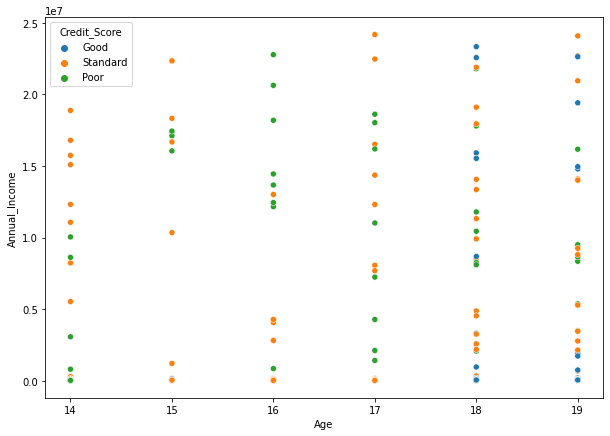

In [23]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_Age_U20,x='Age',y='Annual_Income',hue='Credit_Score')
plt.show()

In [24]:
df_Age_O20=df[df['Age']>20]

In [25]:
df_Age_U30=df_Age_O20[df_Age_O20['Age']<29]

In [26]:
df_Age_U30['Age'].nunique()

8

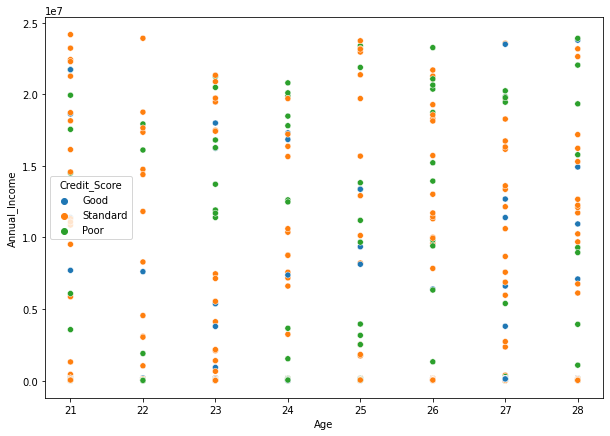

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_Age_U30,x='Age',y='Annual_Income',hue='Credit_Score')
plt.show()

In [28]:
df_Age_O30=df[df['Age']>30]

In [29]:
df_Age_U40=df_Age_O30[df_Age_O30['Age']<39]

In [30]:
df_Age_U40['Age'].nunique()

8

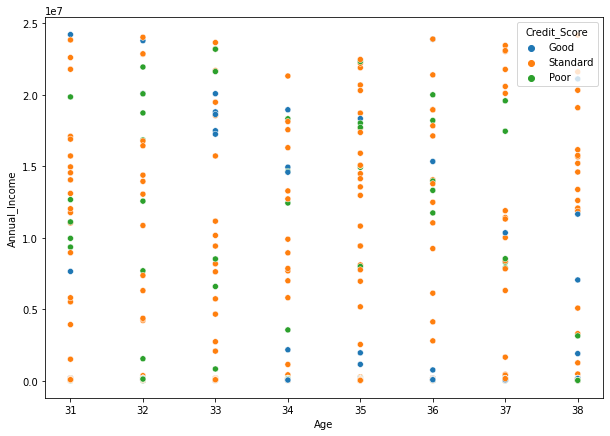

In [31]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_Age_U40,x='Age',y='Annual_Income',hue='Credit_Score')
plt.show()

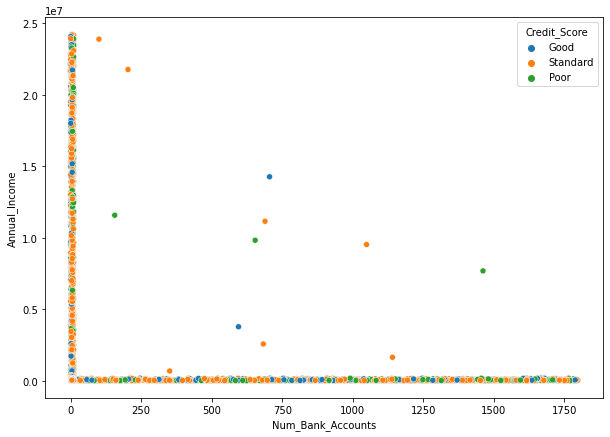

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Num_Bank_Accounts',y='Annual_Income',hue='Credit_Score')
plt.show()

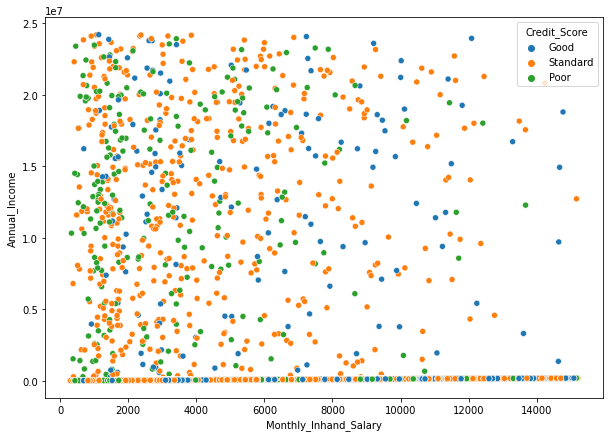

In [33]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Monthly_Inhand_Salary',y='Annual_Income',hue='Credit_Score')
plt.show()

In [34]:
df['Num_of_Loan']

0        4
1        4
3        4
4        4
5        4
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Num_of_Loan, Length: 99114, dtype: object

In [35]:
df['Num_of_Loan'].dtypes

dtype('O')

In [36]:
df[df['Num_of_Loan']=='0_']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
37,21.0,615-06-7821,Developer,35547.71,NaN,7,5,5,0_,NaN,...,Standard,943.86,29.217556,31 Years and 1 Months,Yes,0.000000,37.64363788963997,High_spent_Medium_value_payments,497.6872787770267,Standard
131,20.0,891-55-9364,Accountant,92047.08,7591.590000,6,7,16,0_,NaN,...,Standard,1296.64,42.944682,NaN,Yes,0.000000,120.90755376622221,High_spent_Large_value_payments,878.2514462337779,Poor
144,26.0,084-25-3745,Musician,97791.42,8079.285000,6,6,12,0_,NaN,...,Standard,107.41,25.715579,27 Years and 2 Months,Yes,0.000000,451.24651936958776,Low_spent_Small_value_payments,646.6819806304122,Standard
612,19.0,548-03-9919,Mechanic,34106.78,2767.231667,8,5,17,0_,NaN,...,Standard,996.54,25.343902,32 Years and 3 Months,Yes,0.000000,338.0036514928921,Low_spent_Small_value_payments,228.71951517377454,Standard
615,19.0,548-03-9919,Mechanic,34106.78,NaN,8,5,17,0_,NaN,...,Standard,996.54,30.454879,32 Years and 6 Months,Yes,0.000000,77.87534431690659,High_spent_Medium_value_payments,448.84782234976007,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98675,37.0,846-60-3664,Journalist,137798.88,10609.791909,6,5,13,0_,NaN,...,Standard,1056.3,39.442444,27 Years and 2 Months,No,988.448091,100.22424748516632,High_spent_Large_value_payments,1299.599753,Good
98841,25.0,695-07-0356,Journalist,57700.06,4567.338333,5,6,13,0_,NaN,...,Standard,792.37,31.600991,24 Years and 4 Months,Yes,0.000000,48.014016010984534,High_spent_Large_value_payments,648.719817,Standard
99367,36.0,334-17-4619,Journalist,19147.20,1692.600000,3,5,5,0_,NaN,...,Standard,1347.02,30.228320,27 Years and 5 Months,Yes,75639.000000,119.85574340247256,Low_spent_Small_value_payments,339.404257,Standard
99809,19.0,655-81-0974,_______,39977.21,NaN,4,7,11,0_,NaN,...,Good,832.09,32.676252,NaN,No,0.000000,72.52518029754323,High_spent_Medium_value_payments,535.818236,Good


In [37]:
df['Num_of_Loan']=df['Num_of_Loan'].replace({'0_':0})

In [38]:
df[df['Num_of_Loan']=='0_']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [39]:
df['Num_of_Loan']=pd.to_numeric(df['Num_of_Loan'],errors='coerce')

In [40]:
df['Num_of_Loan'].dtypes

dtype('float64')

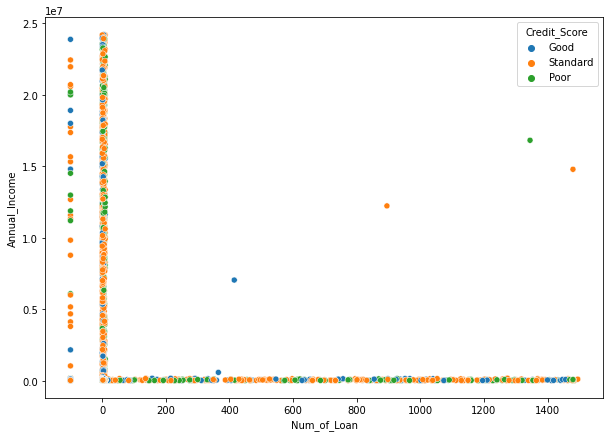

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='Num_of_Loan',y='Annual_Income',hue='Credit_Score')
plt.show()

In [42]:
df['Type_of_Loan']

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
5        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 99114, dtype: object

In [43]:
df['Num_of_Delayed_Payment']

0          7
1        NaN
3          4
4        NaN
5          4
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: Num_of_Delayed_Payment, Length: 99114, dtype: object

In [44]:
df['Num_of_Delayed_Payment'].dtype

dtype('O')

In [45]:
df[df['Num_of_Delayed_Payment']=='8_']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
6,23.0,821-00-0265,Scientist,19114.120,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
176,19.0,028-16-4402,Entrepreneur,106733.130,8873.427500,4,4,1,0.0,NaN,...,_,76.23,29.815896,32 Years and 9 Months,No,0.000000,388.36035366098815,Low_spent_Large_value_payments,768.9823963390119,Good
1348,42.0,451-74-2945,Doctor,31807.000,NaN,8,3,14,2.0,"Student Loan, and Mortgage Loan",...,Standard,611.04,33.563691,20 Years and 5 Months,NM,35.553691,159.35007426670123,High_spent_Small_value_payments,338.4545682042577,Good
1596,34.0,958-76-6001,_______,120366.600,9888.550000,4,7,2,4.0,"Home Equity Loan, Debt Consolidation Loan, Pay...",...,_,1396.64,29.066379,NaN,No,233.442404,860.4550593096493,Low_spent_Medium_value_payments,174.95753706661344,Standard
2190,40.0,645-02-5061,Journalist,63101.140,5246.428333,3,4,3,4.0,"Payday Loan, Home Equity Loan, Debt Consolidat...",...,_,64.53,30.629583,16 Years and 11 Months,No,170.542965,287.43003088020265,Low_spent_Medium_value_payments,346.66983699344206,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96885,52.0,773-09-9216,Writer,105842.960,9094.246667,7,7,15,2.0,"Home Equity Loan, and Mortgage Loan",...,Standard,303.24,38.394655,18 Years and 9 Months,No,122.930182,223.0614174614784,High_spent_Medium_value_payments,813.4330675249058,Standard
97226,43.0,320-64-2724,Engineer,72196.800,6021.400000,7,5,18,6.0,"Mortgage Loan, Auto Loan, Personal Loan, Not S...",...,Standard,797.53,39.730394,16 Years and 4 Months,Yes,189.367792,70.39365784684749,High_spent_Large_value_payments,582.3785502875875,Standard
97573,33.0,094-94-5212,Developer,74557.580,6114.131667,2,5,1,0.0,NaN,...,_,206.26,42.713832,30 Years and 8 Months,No,0.000000,NaN,!@9#%8,786.1946812883413,Good
97580,31.0,601-08-1884,Doctor,14530.755,1184.896250,8,7,7,4.0,"Auto Loan, Personal Loan, Auto Loan, and Mortg...",...,Standard,1279.24,38.272332,29 Years and 1 Months,Yes,28.410940,44.944257185342295,Low_spent_Medium_value_payments,325.13442801582147,Standard


In [46]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].replace({'8_':8})

In [47]:
df[df['Num_of_Delayed_Payment']=='8_']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


In [48]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].replace({'3_':3})

In [49]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].replace({'2_':2})

In [50]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].replace({'13_':13})

In [51]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', 8, '6', '1', '-1', 3, '0', '8', '5', '3', '9', '12',
       '15', '17', '10', '2', 2, '11', '14', '20', '22', '13', 13, '14_',
       '16', '12_', '18', '19', '23', '24', '21', '3318', '3083', '22_',
       '1338', '4_', '26', '11_', '3104', '21_', '25', '10_', '183_',
       '9_', '1106', '834', '19_', '24_', '17_', '23_', '2672', '20_',
       '2008', '-3', '538', '6_', '1_', '16_', '27', '-2', '3478', '2420',
       '15_', '707', '708', '26_', '18_', '3815', '28', '5_', '1867',
       '2250', '1463', '25_', '7_', '4126', '2882', '1941', '2655',
       '2628', '132', '3069', '306', '0_', '3539', '3684', '1823', '4128',
       '1946', '827', '2297', '2566', '904', '182', '929', '3568', '2503',
       '1552', '2812', '1697', '3764', '851', '3905', '923', '88', '1668',
       '3253', '808', '2689', '3858', '642', '3457', '1402', '1732',
       '3154', '847', '3037', '2204', '3103', '1063', '2056', '1282',
       '1841', '2569_', '211', '793', '3484', '411', '3491',

In [52]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].replace({'14_':14,'12_':12,'22_':22,'4_':4,'11_':11,'21_':21,
                                                                   '10_':10,'183_':183,'9_':9,'19_':19,'24_':24,'17_':17,
                                                                   '23_':23,'20_':20,'6_':6, '1_':1,'16_':16,'15_':15,'26_':26,'18_':18,'5_':5,
                                                                   '25_':25, '7_':7,'0_':0,'2569_':2569,
                                                                   '27_':27, '663_':663, '-2_':-2, '28_':28, '-1_':-1,'1323_':1323, '2794_':2794,
                                                                   '2219_':2219, '758_':758, '-3_':-3, '848_':848, '2237_':2237, '3097_':3097,
                                                                   '3840_':3840, '2278_':2278, '1087_':1087, '1295_':1295, '3861_':3861,
                                                                    '2142_':2142, '1473_':1473, '3920_':3920,'2256_':2256,'2566_':2566})

In [53]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', 8, '6', '1', '-1', 3, '0', '8', '5', '3', '9', '12',
       '15', '17', '10', '2', 2, '11', '14', '20', '22', '13', 13, 14,
       '16', 12, '18', '19', '23', '24', '21', '3318', '3083', 22, '1338',
       4, '26', 11, '3104', 21, '25', 10, 183, 9, '1106', '834', 19, 24,
       17, 23, '2672', 20, '2008', '-3', '538', 6, 1, 16, '27', '-2',
       '3478', '2420', 15, '707', '708', 26, 18, '3815', '28', 5, '1867',
       '2250', '1463', 25, 7, '4126', '2882', '1941', '2655', '2628',
       '132', '3069', '306', 0, '3539', '3684', '1823', '4128', '1946',
       '827', '2297', '2566', '904', '182', '929', '3568', '2503', '1552',
       '2812', '1697', '3764', '851', '3905', '923', '88', '1668', '3253',
       '808', '2689', '3858', '642', '3457', '1402', '1732', '3154',
       '847', '3037', '2204', '3103', '1063', '2056', '1282', '1841',
       2569, '211', '793', '3484', '411', '3491', '2072', '3050', '1049',
       '2162', '3402', '2753', 27, '1718', '1014', '3260'

In [54]:
df['Num_of_Delayed_Payment']=pd.to_numeric(df['Num_of_Delayed_Payment'],errors='coerce')

In [55]:
df['Num_of_Delayed_Payment'].dtypes

dtype('float64')

In [56]:
def print_dtypes(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}:{df[column].unique()}')

In [57]:
print_dtypes(df)

SSN:['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Occupation:['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Type_of_Loan:['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Changed_Credit_Limit:['11.27' '6.27' '9.27' ... '17.509999999999998' '25.16' '21.17']
Credit_Mix:['_' 'Good' 'Standard' 'Bad']
Outstanding_Debt:['809.98' '605.03' '1303.01' ... '3571.7_' '3571.7' '502.38']
Credit_History_Age:['22 Years and 1 Months' nan '22 Years and 4 Months'
 '22 Years and 5 Months' '22 Years and 6 Months' '22 Years and 7 Months'
 '26 Year

In [58]:
df[df['Occupation']=='_______']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,NaN,004-07-5839,_______,34847.84,3037.986667,2,4,6,1.0,Credit-Builder Loan,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,34.0,486-85-3974,_______,143162.64,12187.220000,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,34.0,486-85-3974,_______,143162.64,NaN,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,34.0,486-85-3974,_______,143162.64,12187.220000,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,55.0,#F%$D@*&8,_______,30689.89,2612.490833,2,5,4,1.0,Not Specified,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99912,54.0,683-59-7399,_______,20059.98,1523.665000,8,5,12,4.0,"Home Equity Loan, Payday Loan, Not Specified, ...",...,Good,909.01,30.568185,16 Years and 3 Months,No,6980.000000,151.21408617712285,Low_spent_Medium_value_payments,236.075587,Poor
99920,37.0,647-67-8889,_______,139664.96,11777.746667,3,6,12,4.0,"Credit-Builder Loan, Credit-Builder Loan, Stud...",...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,38.0,546-94-4789,_______,15319.65,1460.637500,6,7,15,4.0,"Home Equity Loan, Auto Loan, Auto Loan, and Au...",...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99943,48.0,226-45-0652,_______,22620.79,NaN,6,2,9,0.0,NaN,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


In [59]:
df=df[df['Occupation']!='_______']

In [60]:
df['Occupation'].value_counts()

Lawyer           6505
Architect        6303
Engineer         6295
Scientist        6238
Mechanic         6229
Accountant       6221
Media_Manager    6176
Developer        6169
Teacher          6153
Entrepreneur     6134
Journalist       6036
Doctor           6025
Manager          5932
Musician         5857
Writer           5840
Name: Occupation, dtype: int64

In [61]:
df['Changed_Credit_Limit']

0        11.27
1        11.27
3         6.27
4        11.27
5         9.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 92113, dtype: object

In [62]:
df[df['Changed_Credit_Limit']=='_']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
65,23.0,070-19-1622,Doctor,114838.410,9843.867500,2,5,7,3.0,"Personal Loan, Debt Consolidation Loan, and Au...",...,Good,1377.74,27.626325,21 Years and 5 Months,NM,226.892792,212.23560220847847,High_spent_Large_value_payments,785.2583558699787,Good
66,23.0,070-19-1622,Doctor,NaN,NaN,2,5,7,3.0,"Personal Loan, Debt Consolidation Loan, and Au...",...,Good,1377.74,35.141567,21 Years and 6 Months,NM,226.892792,470.3857956796373,High_spent_Small_value_payments,547.1081623988198,Good
109,39.0,328-33-6328,Manager,8701.545,519.128750,6,5,32,7.0,"Personal Loan, Payday Loan, Student Loan, Auto...",...,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613407134115,Low_spent_Medium_value_payments,242.43306442147872,Poor
110,39.0,328-33-6328,Manager,8701.545,NaN,6,5,32,7.0,"Personal Loan, Payday Loan, Student Loan, Auto...",...,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806299271933,Low_spent_Medium_value_payments,264.8928715293409,Poor
177,20.0,028-16-4402,Entrepreneur,106733.130,8873.427500,4,4,1,0.0,NaN,...,_,76.23,28.108086,32 Years and 10 Months,No,0.000000,807.2067768357648,Low_spent_Small_value_payments,370.1359731642354,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99509,17.0,569-84-9250,Accountant,72572.460,6233.705000,4,4,7,4.0,"Personal Loan, Student Loan, Student Loan, and...",...,Standard,1321.46_,39.578007,20 Years and 3 Months,Yes,176.374432,76.46379642912784,!@9#%8,610.532272,Standard
99548,28.0,272-33-1370,Writer,29090.500,2472.208333,5,7,20,4.0,"Not Specified, Mortgage Loan, Personal Loan, a...",...,_,1612.7,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299066480114,High_spent_Medium_value_payments,394.379803,Poor
99618,7490.0,721-45-4479,Writer,142560.360,11773.030000,6,3,13,1.0,Student Loan,...,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.7874766731884,High_spent_Large_value_payments,1145.743429,Standard
99800,16.0,441-26-1297,Developer,14937.490,NaN,8,8,22,7.0,"Student Loan, Mortgage Loan, Debt Consolidatio...",...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.58693258712627,Low_spent_Small_value_payments,255.731272,Standard


In [63]:
df=df[df['Changed_Credit_Limit']!='_']

In [64]:
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')

In [65]:
df['Changed_Credit_Limit'].dtypes

dtype('float64')

In [66]:
df['Changed_Credit_Limit']

0        11.27
1        11.27
3         6.27
4        11.27
5         9.27
         ...  
99995    11.50
99996    11.50
99997    11.50
99998    11.50
99999    11.50
Name: Changed_Credit_Limit, Length: 90193, dtype: float64

In [67]:
df['Credit_Mix'].value_counts()

Standard    32950
Good        21918
_           18236
Bad         17089
Name: Credit_Mix, dtype: int64

In [68]:
df=df[df['Credit_Mix']!='_']

In [69]:
df['Credit_Mix'].value_counts()

Standard    32950
Good        21918
Bad         17089
Name: Credit_Mix, dtype: int64

In [70]:
df['Outstanding_Debt'].dtypes

dtype('O')

In [71]:
df['Outstanding_Debt']=pd.to_numeric(df['Outstanding_Debt'],errors='coerce')

In [72]:
df.shape

(71957, 24)

In [73]:
df['Outstanding_Debt'].dtypes

dtype('float64')

In [74]:
df['Amount_invested_monthly'].dtypes

dtype('O')

In [75]:
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')

In [76]:
df['Amount_invested_monthly'].dtypes

dtype('float64')

In [77]:
df['Monthly_Balance']=pd.to_numeric(df['Monthly_Balance'],errors='coerce')

In [78]:
df['Monthly_Balance'].dtypes

dtype('float64')

In [79]:
df[df['Payment_Behaviour']=='!@9#%8']

,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5,23.0,821-00-0265,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
32,21.0,615-06-7821,Developer,NaN,2853.309167,7,5,5,0.0,NaN,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.725394,!@9#%8,288.605522,Standard
47,31.0,612-70-8987,Lawyer,73928.46,5988.705000,4,5,8,0.0,NaN,...,Good,548.20,31.580990,32 Years and 6 Months,No,0.000000,42.635590,!@9#%8,796.234910,Good
54,NaN,#F%$D@*&8,Lawyer,10909427.00,NaN,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.391898,!@9#%8,326.241830,Good
61,30.0,500-92-6408,Media_Manager,34081.38,2611.115000,8,7,15,-100.0,"Not Specified, Auto Loan, and Student Loan",...,Standard,1704.18,31.170872,15 Years and 0 Months,Yes,70.478333,NaN,!@9#%8,410.674366,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99906,39.0,094-81-5856,Writer,87695.34,NaN,2,7,7,0.0,NaN,...,Good,361.68,36.982569,19 Years and 3 Months,No,0.000000,150.508824,!@9#%8,823.285676,Standard
99907,39.0,094-81-5856,Writer,87695.34,7337.945000,2,7,7,0.0,NaN,...,Good,361.68,26.745973,19 Years and 4 Months,No,0.000000,154.229428,!@9#%8,819.565072,Standard
99947,33.0,837-85-9800,Media_Manager,59146.36,4908.863333,2,5,6,1.0,Personal Loan,...,Good,418.03,28.091458,20 Years and 4 Months,No,26.778419,183.584149,!@9#%8,530.523765,Standard
99982,50.0,133-16-7738,Writer,37188.10,3097.008333,1,4,5,3.0,"Home Equity Loan, Mortgage Loan, and Student Loan",...,Good,620.64,38.850680,30 Years and 3 Months,No,84.205949,82.825572,!@9#%8,412.669312,Good


In [80]:
df=df[df['Payment_Behaviour']!='!@9#%8']

In [81]:
df.shape

(66455, 24)

In [82]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      18293
High_spent_Medium_value_payments    12679
Low_spent_Medium_value_payments      9977
High_spent_Large_value_payments      9896
High_spent_Small_value_payments      8115
Low_spent_Large_value_payments       7495
Name: Payment_Behaviour, dtype: int64

In [83]:
print_dtypes(df)

SSN:['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990']
Occupation:['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Type_of_Loan:['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Credit_Mix:['Good' 'Standard' 'Bad']
Credit_History_Age:[nan '22 Years and 4 Months' '22 Years and 5 Months'
 '22 Years and 7 Months' '26 Years and 8 Months' '26 Years and 10 Months'
 '26 Years and 11 Months' '27 Years and 0 Months' '27 Years and 1 Months'
 '27 Years and 2 Months' '17 Years and 10 Months' '18 Years and 2 Months'
 '18 Years and 3 Months' '18 Years and 

In [84]:
df=df.drop(['Credit_History_Age','SSN'],axis=1)

In [85]:
print_dtypes(df)

Occupation:['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Type_of_Loan:['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
Credit_Mix:['Good' 'Standard' 'Bad']
Payment_of_Min_Amount:['No' 'NM' 'Yes']
Payment_Behaviour:['Low_spent_Large_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'High_spent_Small_value_payments']
Credit_Score:['Good' 'Standard' 'Poor']


In [86]:
def col_unique(df):
    for column in df:
        print(f'{column}:{df[column].value_counts()}')

In [87]:
col_unique(df)

Age:38.0      1893
26.0      1885
28.0      1881
31.0      1880
35.0      1839
          ... 
6722.0       1
4732.0       1
1754.0       1
3966.0       1
2263.0       1
Name: Age, Length: 1143, dtype: int64
Occupation:Lawyer           4711
Architect        4592
Engineer         4538
Accountant       4518
Scientist        4516
Mechanic         4476
Media_Manager    4455
Developer        4442
Teacher          4429
Entrepreneur     4429
Journalist       4372
Doctor           4335
Manager          4258
Musician         4229
Writer           4155
Name: Occupation, dtype: int64
Annual_Income:95596.35       13
36585.12       12
17816.75       12
17273.83       12
22434.16       11
               ..
62805.48        1
15246551.00     1
5388987.00      1
11040265.00     1
9669945.00      1
Name: Annual_Income, Length: 13106, dtype: int64
Monthly_Inhand_Salary:3080.555000    11
6358.956667    11
5766.491667    10
1315.560833     9
6769.130000     9
               ..
458.671250      1
3127.545443 

In [88]:
df[df['Age']>100]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56,7580.0,Media_Manager,NaN,NaN,8,7,15,3.0,"Not Specified, Auto Loan, and Student Loan",30,...,5.0,Standard,1704.18,24.448063,NM,70.478333,162.441009,Low_spent_Large_value_payments,298.192158,Poor
122,181.0,Scientist,31993.78,2942.148333,6,6,7,2.0,"Payday Loan, and Home Equity Loan",8,...,1.0,Standard,818.22,27.380109,Yes,45.141298,264.257089,Low_spent_Small_value_payments,274.816447,Standard
219,995.0,Accountant,43070.24,3622.186667,3,3,18,1.0,Debt Consolidation Loan,11,...,4.0,Standard,1233.10,24.331772,Yes,30.576085,74.920375,High_spent_Medium_value_payments,506.722207,Standard
301,7080.0,Engineer,72559.36,6284.613333,4,5,17,-100.0,"Home Equity Loan, Mortgage Loan, Credit-Builde...",16,...,1.0,Standard,1173.70,38.080380,No,215.839171,172.962178,High_spent_Medium_value_payments,489.659985,Standard
328,849.0,Accountant,30788.44,2623.703333,7,9,31,6.0,"Credit-Builder Loan, Payday Loan, Home Equity ...",49,...,9.0,Bad,3470.08,24.616735,Yes,114.533021,232.138817,Low_spent_Large_value_payments,185.698496,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99776,8425.0,Writer,18512.97,1494.747500,7,5,18,3.0,"Student Loan, Student Loan, and Mortgage Loan",15,...,6.0,Standard,1366.56,29.253092,Yes,24.621173,63.282651,High_spent_Medium_value_payments,311.570927,Standard
99873,3891.0,Scientist,118677.54,9963.795000,4,4,6,4.0,"Debt Consolidation Loan, Personal Loan, Credit...",2,...,1.0,Good,995.47,36.065495,No,237.106366,641.849589,Low_spent_Medium_value_payments,397.423545,Standard
99877,6476.0,Scientist,118677.54,9963.795000,4,4,6,-100.0,"Debt Consolidation Loan, Personal Loan, Credit...",3,...,5.0,Good,995.47,38.556181,No,237.106366,231.276530,High_spent_Large_value_payments,767.996604,Good
99913,2263.0,Media_Manager,20059.98,1523.665000,8,5,12,4.0,"Home Equity Loan, Payday Loan, Not Specified, ...",25,...,3.0,Good,909.01,25.982154,No,45.076827,74.713580,High_spent_Small_value_payments,292.576093,Poor


In [89]:
df=df[df['Age']<100]

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61933 entries, 1 to 99998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       61933 non-null  float64
 1   Occupation                61933 non-null  object 
 2   Annual_Income             57531 non-null  float64
 3   Monthly_Inhand_Salary     52688 non-null  float64
 4   Num_Bank_Accounts         61933 non-null  int64  
 5   Num_Credit_Card           61933 non-null  int64  
 6   Interest_Rate             61933 non-null  int64  
 7   Num_of_Loan               59288 non-null  float64
 8   Type_of_Loan              55057 non-null  object 
 9   Delay_from_due_date       61933 non-null  int64  
 10  Num_of_Delayed_Payment    57634 non-null  float64
 11  Changed_Credit_Limit      61933 non-null  float64
 12  Num_Credit_Inquiries      60715 non-null  float64
 13  Credit_Mix                61933 non-null  object 
 14  Outsta

In [91]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
3,23.0,Scientist,19114.12,NaN,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
6,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,Good,809.98,23.933795,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard


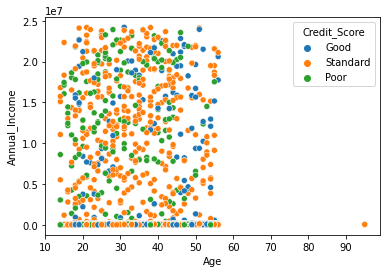

In [92]:
sns.scatterplot(data=df,x='Age',y='Annual_Income',hue='Credit_Score')
plt.show()

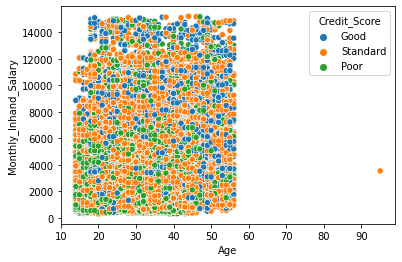

In [93]:
sns.scatterplot(data=df,x='Age',y='Monthly_Inhand_Salary',hue='Credit_Score')
plt.show()

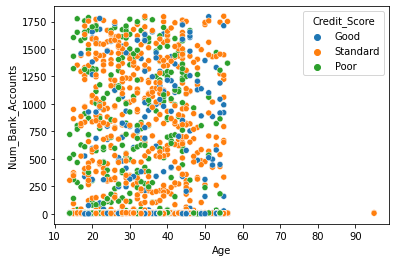

In [94]:
sns.scatterplot(data=df,x='Age',y='Num_Bank_Accounts',hue='Credit_Score')
plt.show()

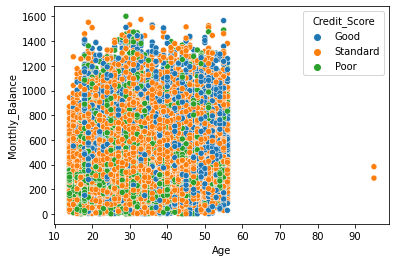

In [95]:
sns.scatterplot(data=df,x='Age',y='Monthly_Balance',hue='Credit_Score')
plt.show()

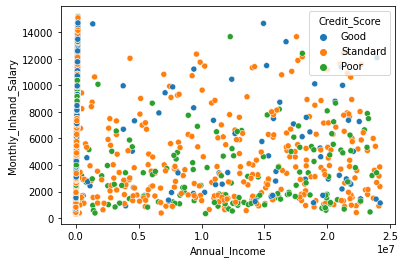

In [96]:
sns.scatterplot(data=df,x='Annual_Income',y='Monthly_Inhand_Salary',hue='Credit_Score')
plt.show()

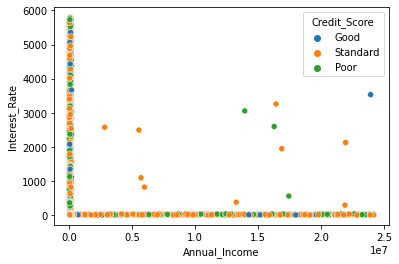

In [97]:
sns.scatterplot(data=df,x='Annual_Income',y='Interest_Rate',hue='Credit_Score')
plt.show()

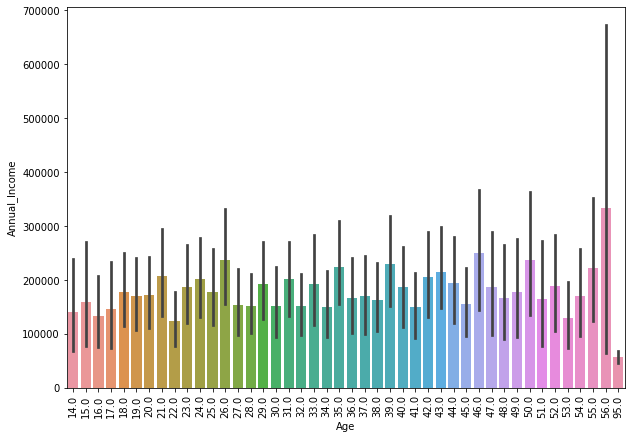

In [98]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Annual_Income')
plt.show()

C:\Users\power\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


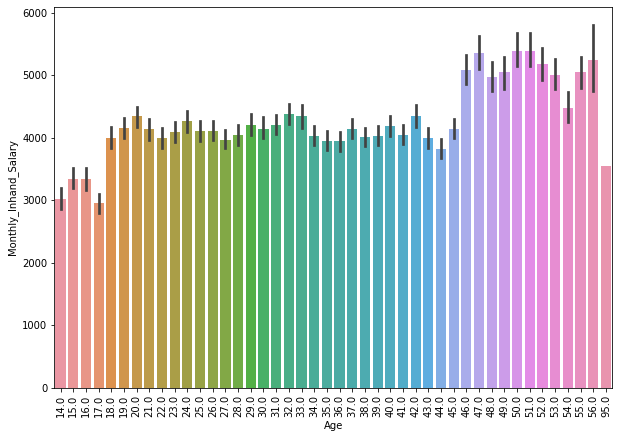

In [99]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Monthly_Inhand_Salary')
plt.show()

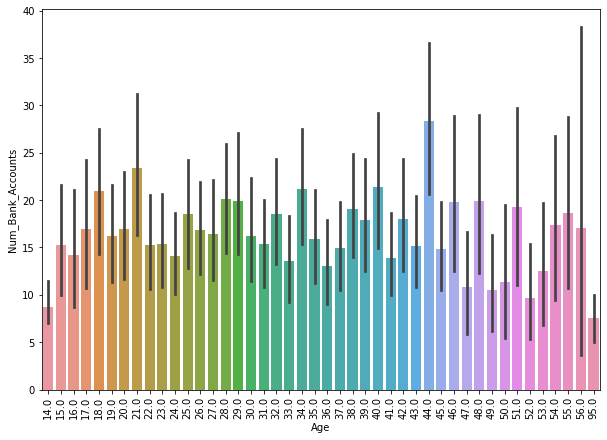

In [100]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Num_Bank_Accounts')
plt.show()

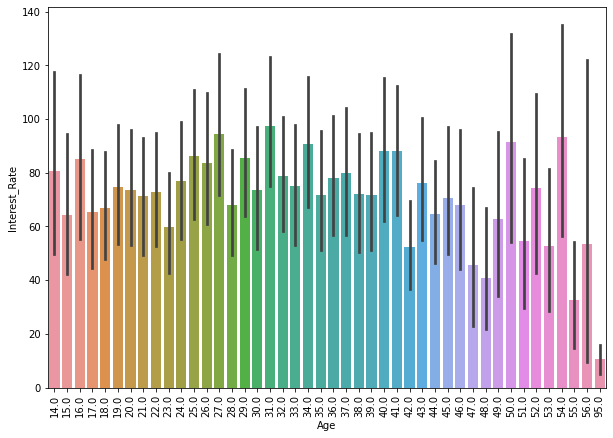

In [101]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Interest_Rate')
plt.show()

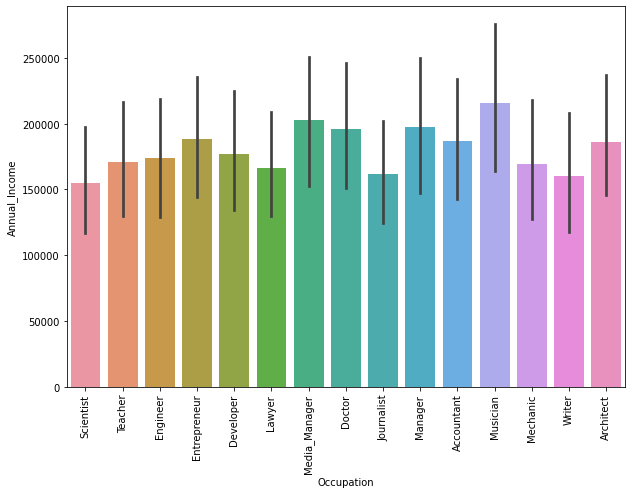

In [102]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Annual_Income')
plt.show()

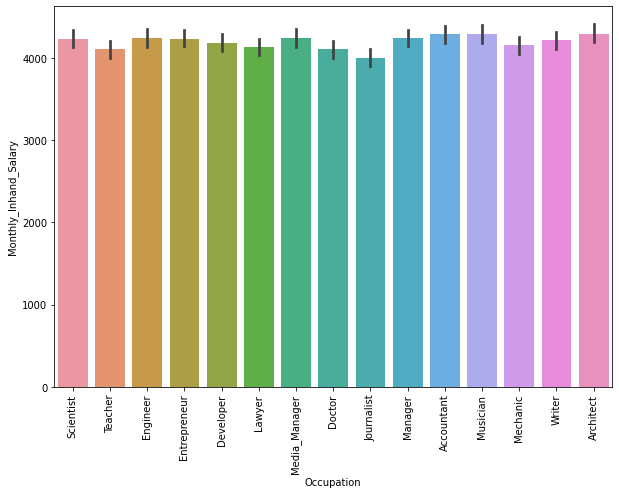

In [103]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Monthly_Inhand_Salary')
plt.show()

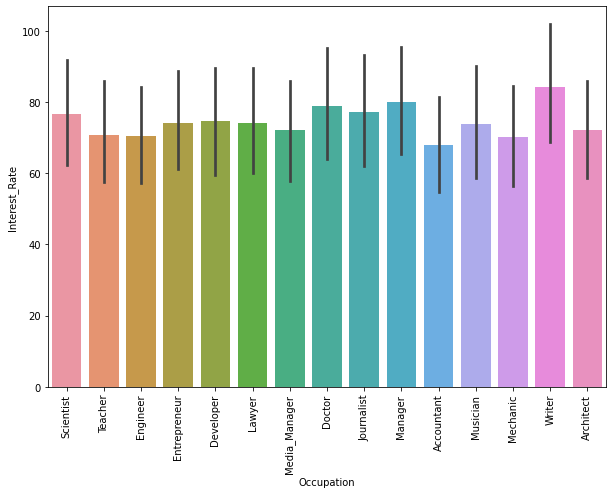

In [104]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Interest_Rate')
plt.show()

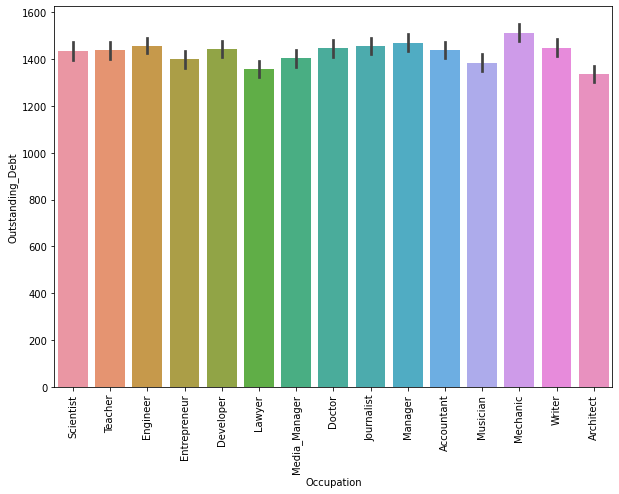

In [105]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Outstanding_Debt')
plt.show()

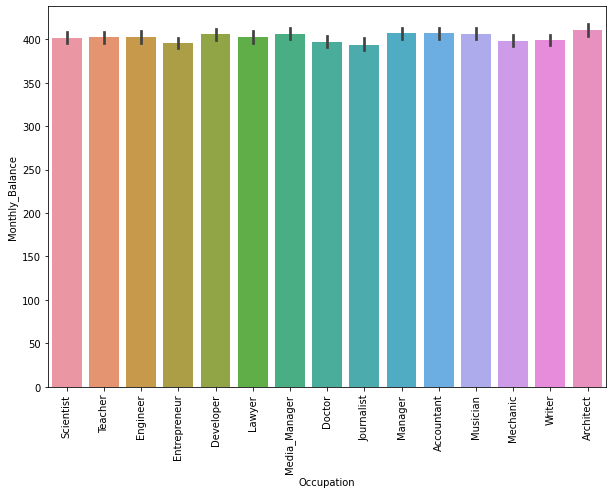

In [106]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Monthly_Balance')
plt.show()

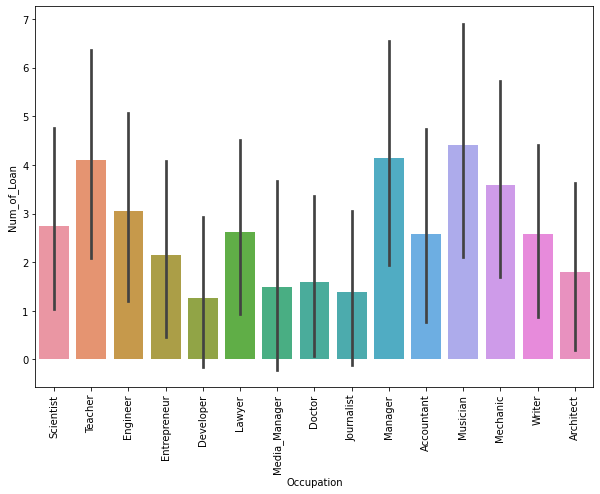

In [107]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Num_of_Loan')
plt.show()

In [108]:
df[df['Num_of_Loan']<0]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
31,55.0,Entrepreneur,30689.890,2612.490833,2,5,4,-100.0,Not Specified,4,...,4.0,Good,632.46,27.332515,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,Standard
34,21.0,Developer,35547.710,2853.309167,7,5,5,-100.0,NaN,5,...,4.0,Standard,943.86,23.462303,Yes,0.000000,173.138651,Low_spent_Medium_value_payments,392.192266,Standard
39,21.0,Developer,35547.710,2853.309167,7,5,5,-100.0,NaN,1,...,4.0,Standard,943.86,25.862922,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,Standard
53,34.0,Lawyer,131313.400,NaN,0,1,8,-100.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,41.980170,No,911.220179,86.566388,High_spent_Large_value_payments,1140.067340,Standard
64,23.0,Doctor,114838.410,9843.867500,2,5,7,-100.0,"Personal Loan, Debt Consolidation Loan, and Au...",13,...,3.0,Good,1377.74,33.664554,No,226.892792,215.193516,High_spent_Small_value_payments,802.300442,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99801,16.0,Developer,14937.490,1142.790833,8,8,387,-100.0,"Student Loan, Mortgage Loan, Debt Consolidatio...",42,...,6.0,Bad,3699.44,35.964828,Yes,50.960878,149.887864,Low_spent_Small_value_payments,203.430341,Standard
99840,23.0,Architect,11834.645,688.220417,5,7,10,-100.0,"Credit-Builder Loan, and Payday Loan",27,...,7.0,Standard,1095.90,26.836333,Yes,11.089575,35.551466,Low_spent_Medium_value_payments,302.181000,Standard
99859,43.0,Architect,NaN,817.013333,8,4,16,-100.0,NaN,17,...,4.0,Standard,1350.85,31.460700,Yes,0.000000,49.033808,Low_spent_Large_value_payments,302.667526,Standard
99902,34.0,Entrepreneur,41329.560,3421.130000,2,3,7,-100.0,Not Specified,2,...,2.0,Good,1245.01,39.011550,No,20.553577,462.117634,Low_spent_Small_value_payments,149.441790,Good


In [109]:
df=df[df['Num_of_Loan']>0]

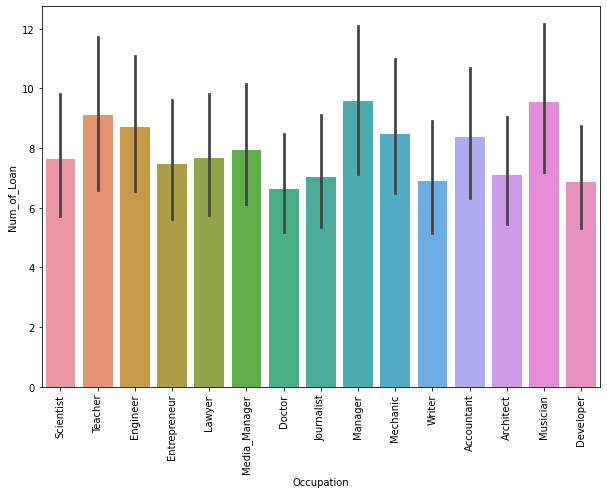

In [110]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Num_of_Loan')
plt.show()

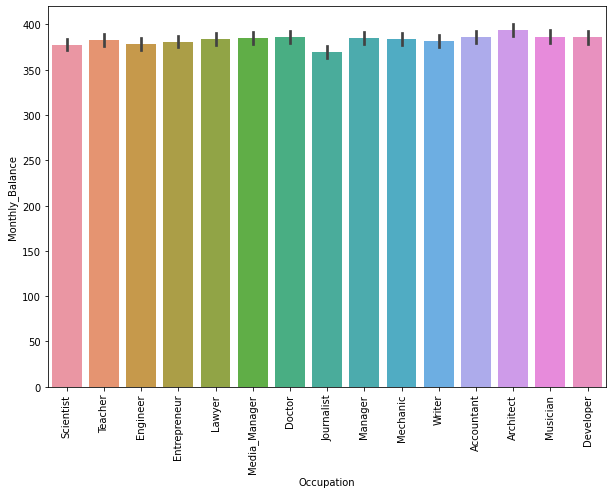

In [111]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Monthly_Balance')
plt.show()

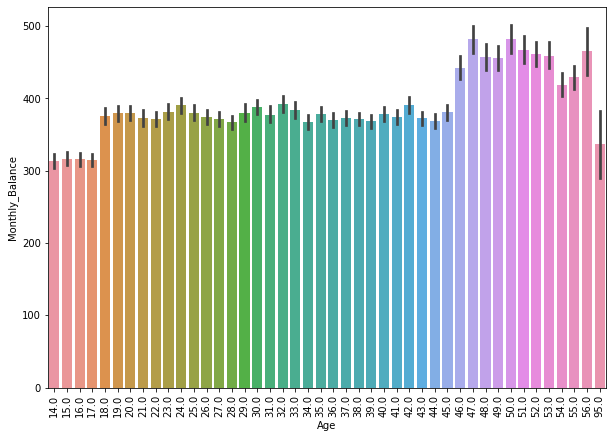

In [112]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Monthly_Balance')
plt.show()

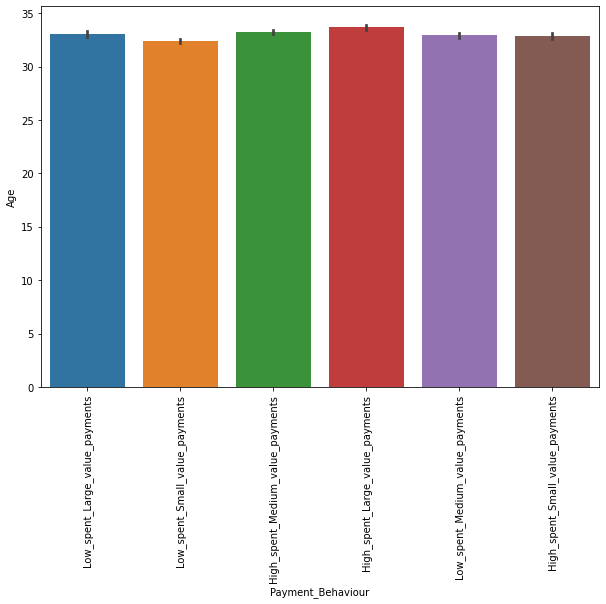

In [113]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Payment_Behaviour',y='Age')
plt.show()

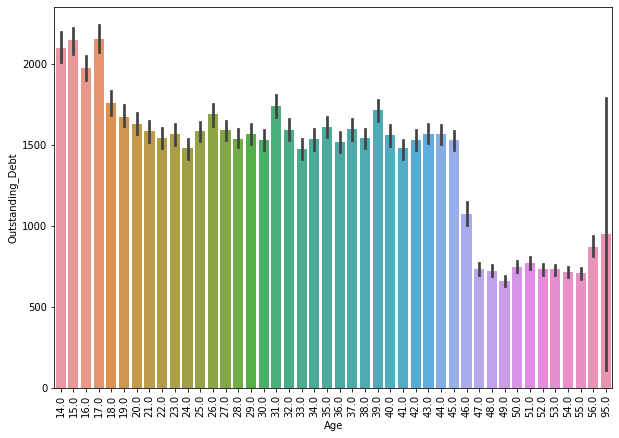

In [114]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Outstanding_Debt')
plt.show()

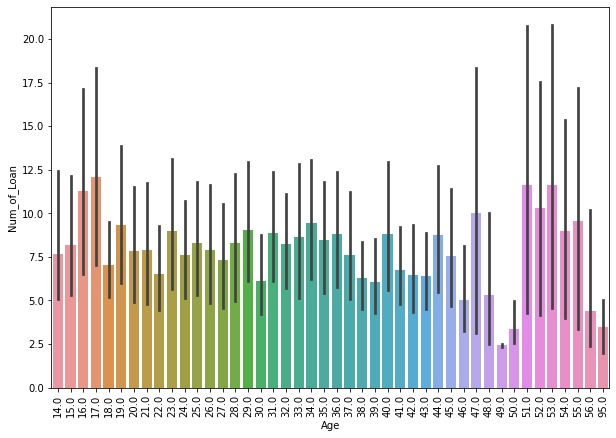

In [115]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Num_of_Loan')
plt.show()

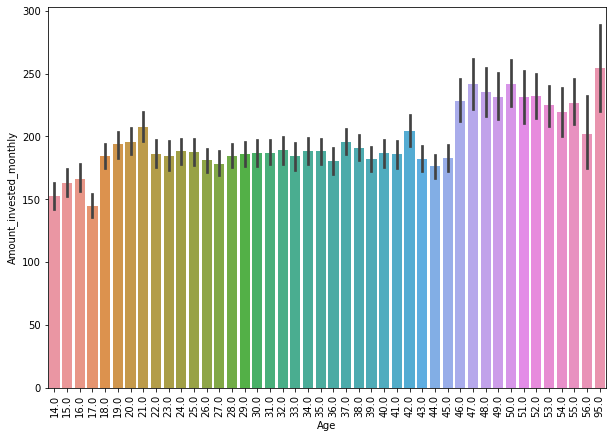

In [116]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Age',y='Amount_invested_monthly')
plt.show()

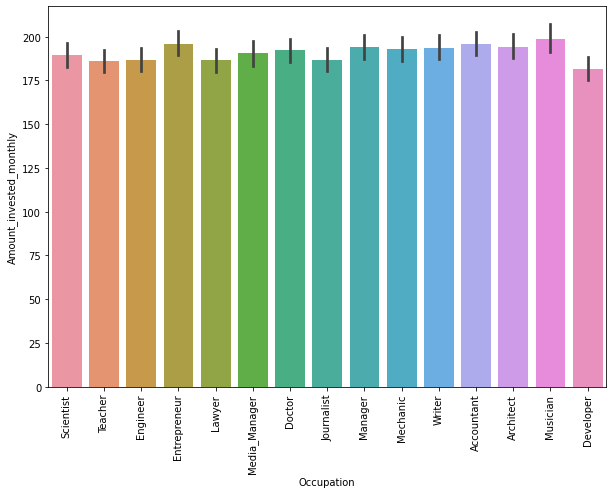

In [117]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Occupation',y='Amount_invested_monthly')
plt.show()

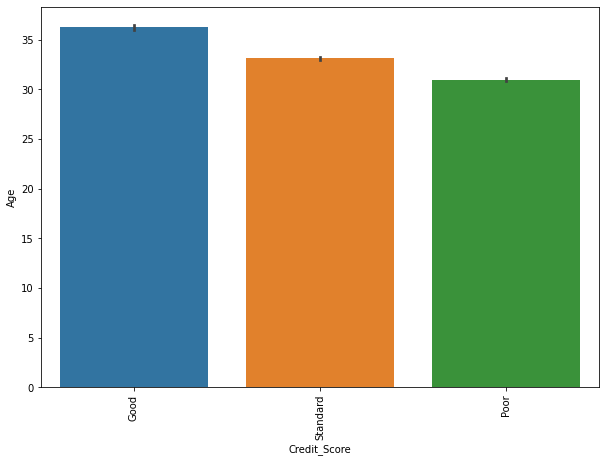

In [118]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Age')
plt.show()

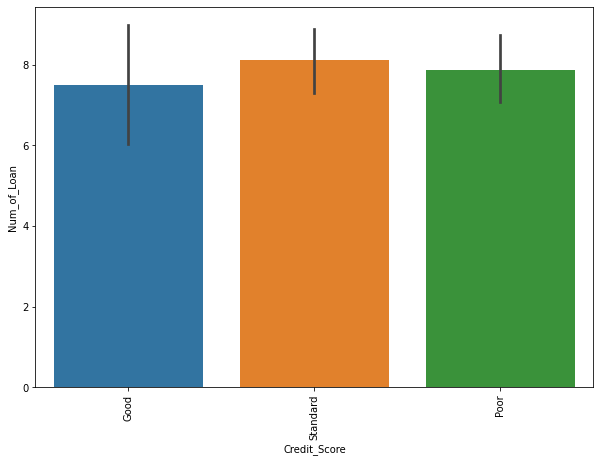

In [119]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Num_of_Loan')
plt.show()

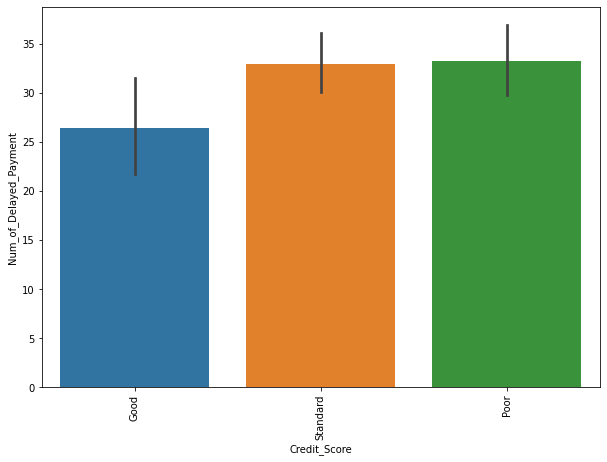

In [120]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Num_of_Delayed_Payment')
plt.show()

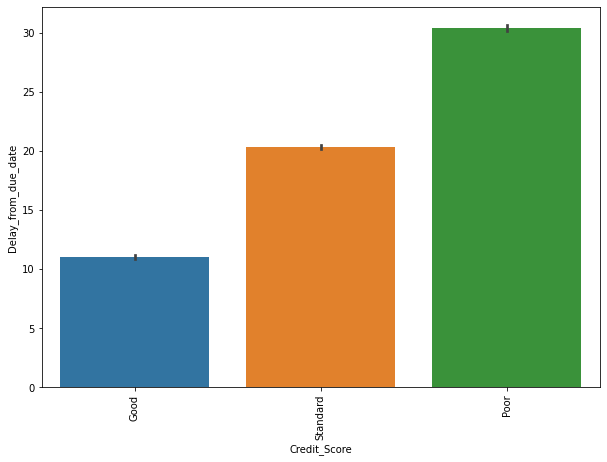

In [121]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Delay_from_due_date')
plt.show()

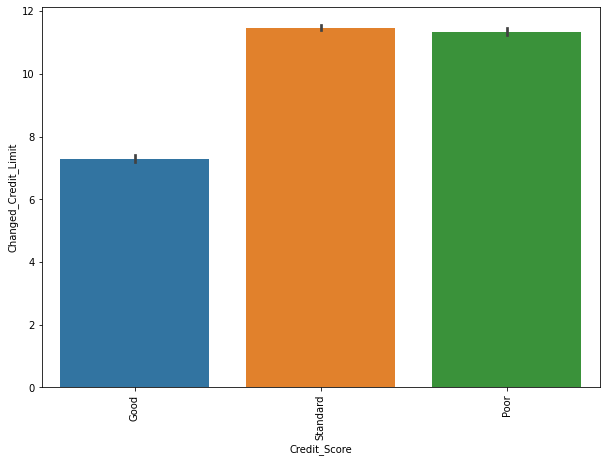

In [122]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Changed_Credit_Limit')
plt.show()

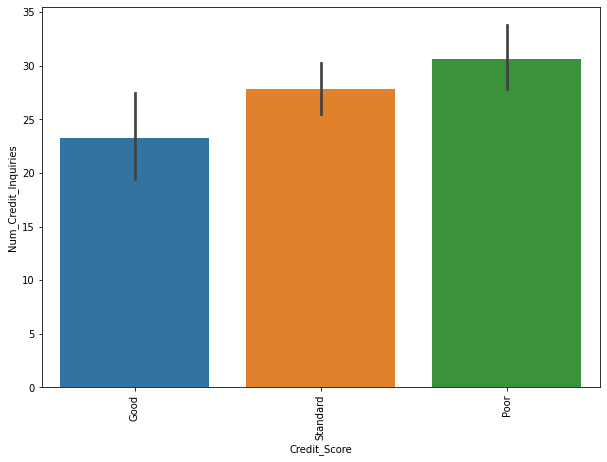

In [123]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Num_Credit_Inquiries')
plt.show()

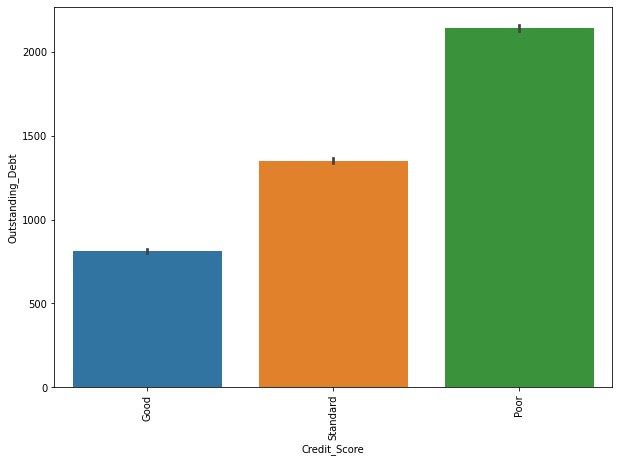

In [124]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Outstanding_Debt')
plt.show()

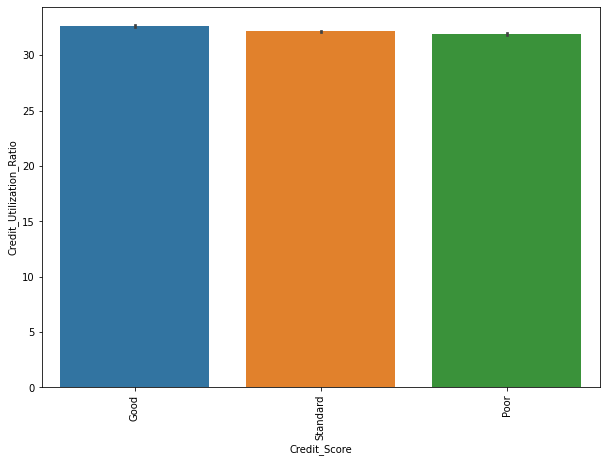

In [125]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Credit_Utilization_Ratio')
plt.show()

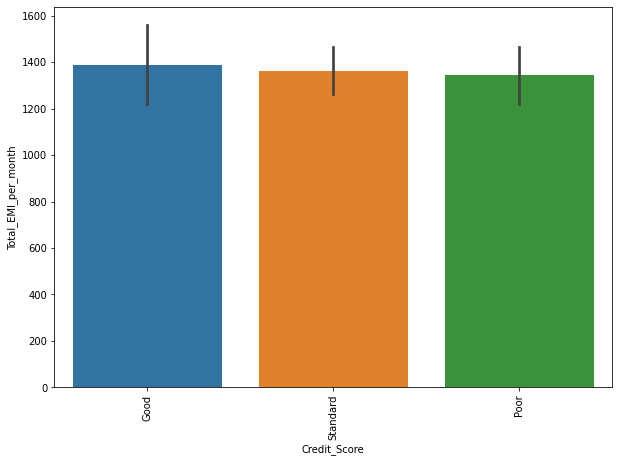

In [126]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Total_EMI_per_month')
plt.show()

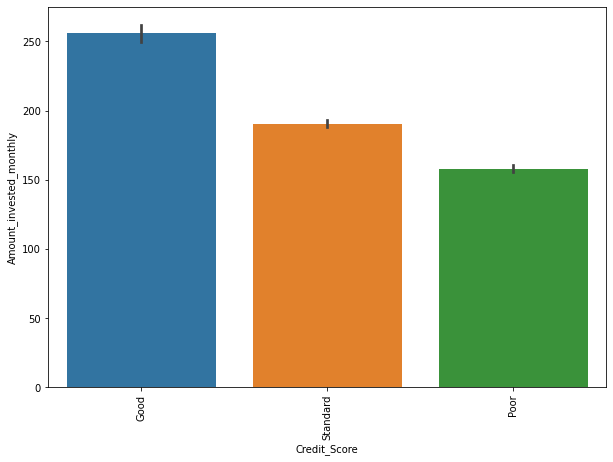

In [127]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Amount_invested_monthly')
plt.show()

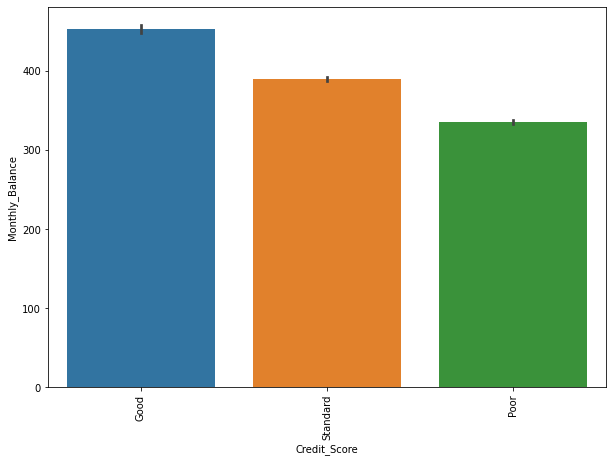

In [128]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Monthly_Balance')
plt.show()

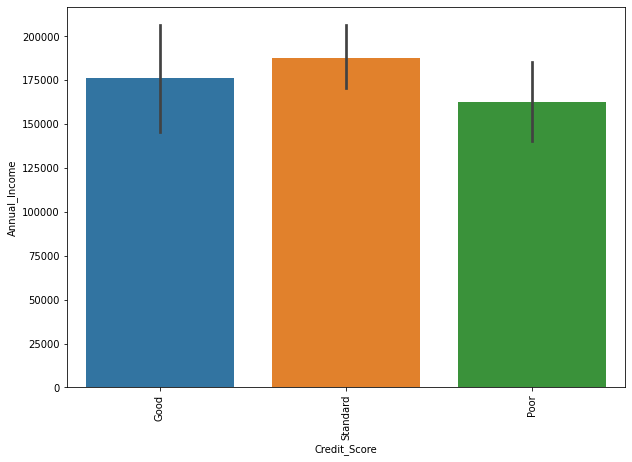

In [129]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Annual_Income')
plt.show()

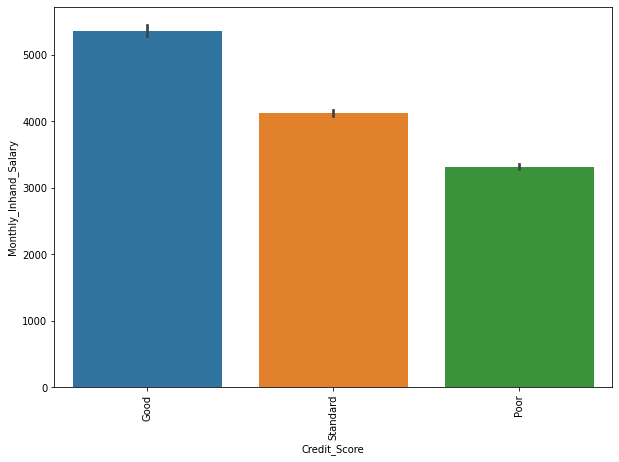

In [130]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Monthly_Inhand_Salary')
plt.show()

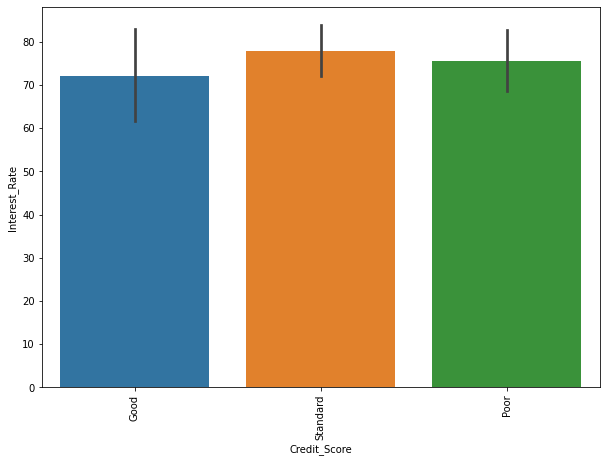

In [131]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='Credit_Score',y='Interest_Rate')
plt.show()

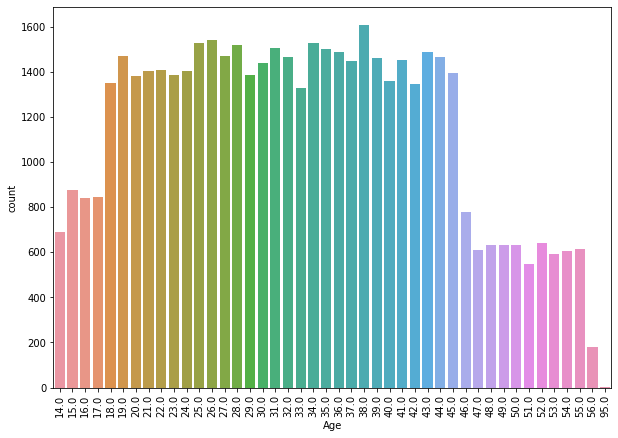

In [132]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Age')
plt.show()

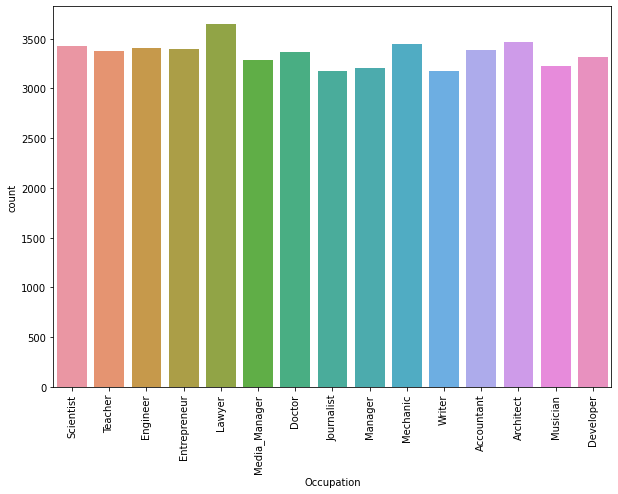

In [133]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Occupation')
plt.show()

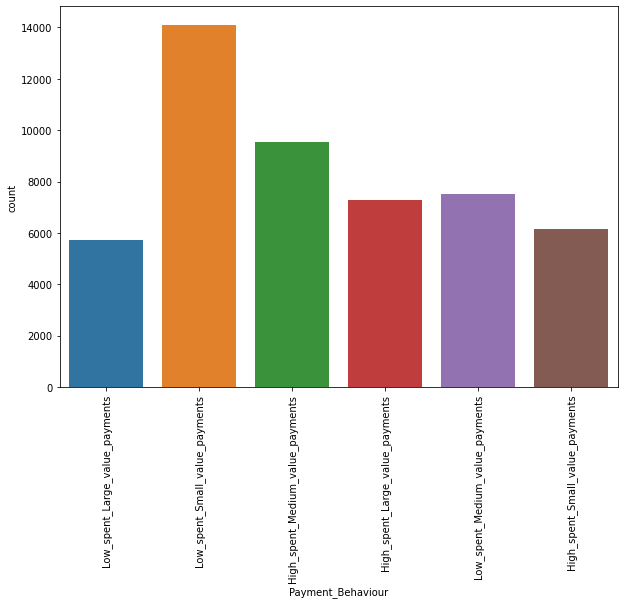

In [134]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Payment_Behaviour')
plt.show()

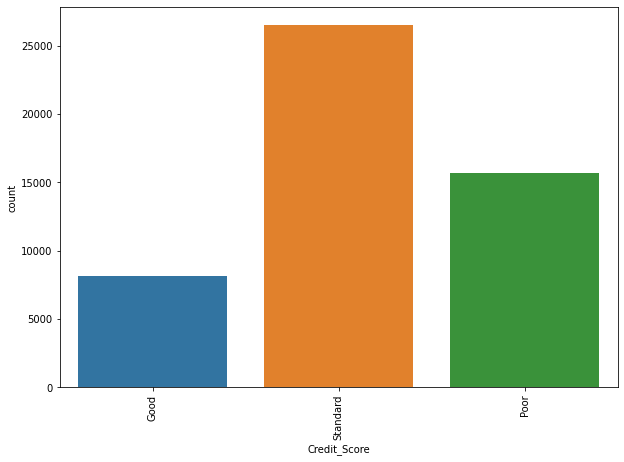

In [135]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.countplot(data=df,x='Credit_Score')
plt.show()

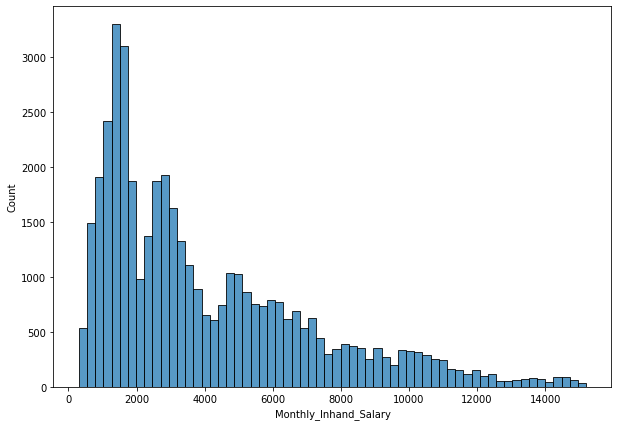

In [136]:
plt.figure(figsize=(10,7))
sns.histplot(df['Monthly_Inhand_Salary'])
plt.show()

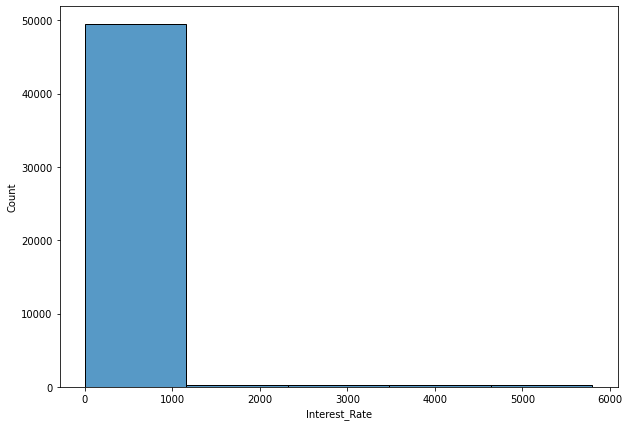

In [137]:
plt.figure(figsize=(10,7))
sns.histplot(df['Interest_Rate'],bins=5)
plt.show()

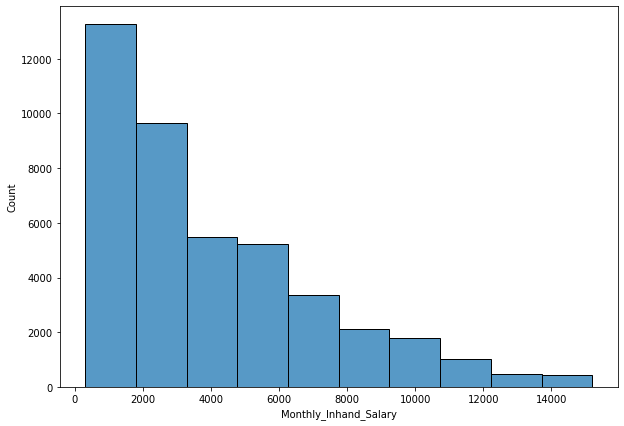

In [138]:
plt.figure(figsize=(10,7))
sns.histplot(df['Monthly_Inhand_Salary'],bins=10)
plt.show()

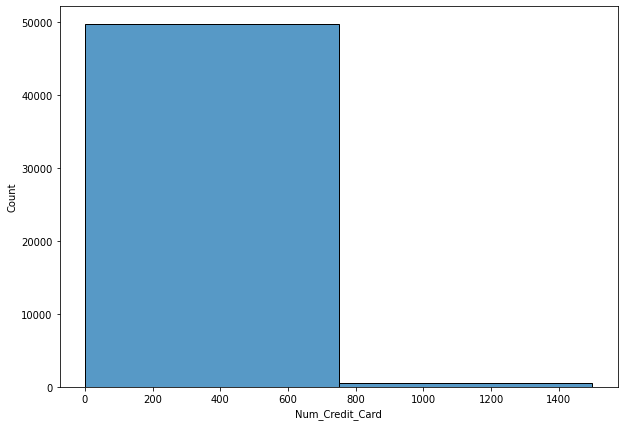

In [139]:
plt.figure(figsize=(10,7))
sns.histplot(df['Num_Credit_Card'],bins=2)
plt.show()

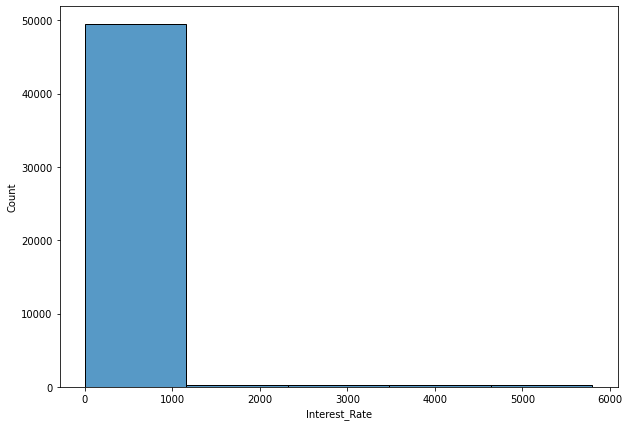

In [140]:
plt.figure(figsize=(10,7))
sns.histplot(df['Interest_Rate'],bins=5)
plt.show()

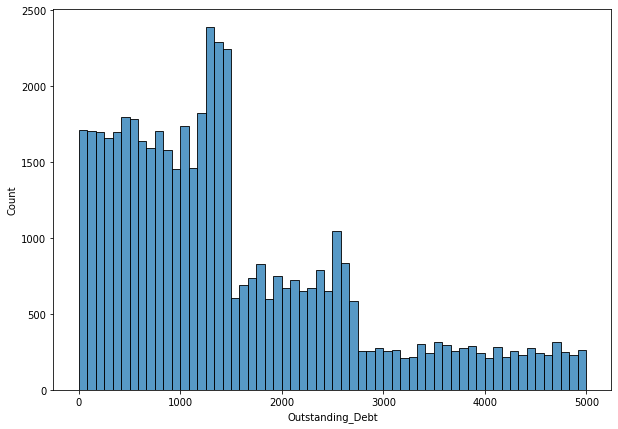

In [141]:
plt.figure(figsize=(10,7))
sns.histplot(df['Outstanding_Debt'])
plt.show()

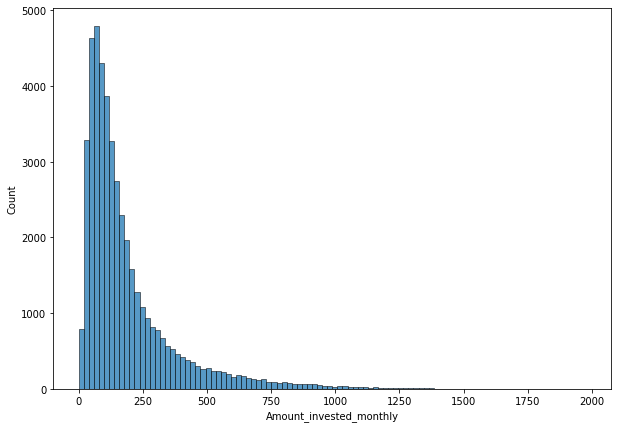

In [142]:
plt.figure(figsize=(10,7))
sns.histplot(df['Amount_invested_monthly'],bins=100)
plt.show()

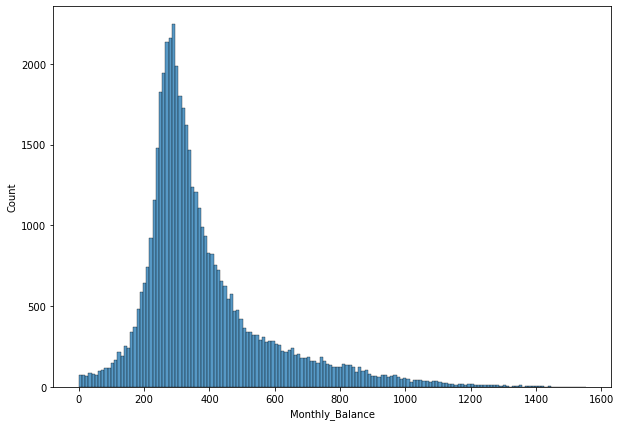

In [143]:
plt.figure(figsize=(10,7))
sns.histplot(df['Monthly_Balance'])
plt.show()

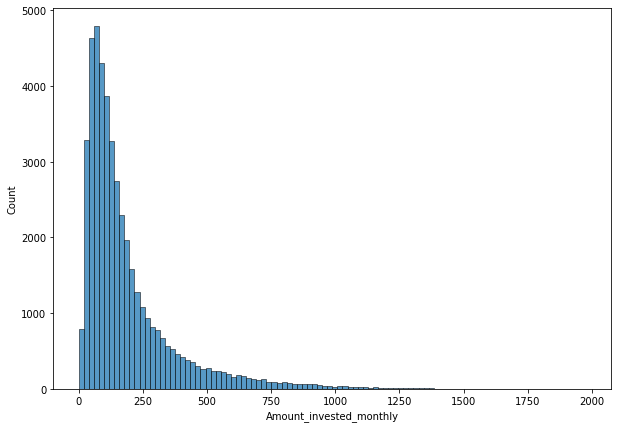

In [144]:
plt.figure(figsize=(10,7))
sns.histplot(df['Amount_invested_monthly'],bins=100)
plt.show()

In [145]:
df.shape

(50281, 22)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50281 entries, 1 to 99998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       50281 non-null  float64
 1   Occupation                50281 non-null  object 
 2   Annual_Income             46736 non-null  float64
 3   Monthly_Inhand_Salary     42784 non-null  float64
 4   Num_Bank_Accounts         50281 non-null  int64  
 5   Num_Credit_Card           50281 non-null  int64  
 6   Interest_Rate             50281 non-null  int64  
 7   Num_of_Loan               50281 non-null  float64
 8   Type_of_Loan              50250 non-null  object 
 9   Delay_from_due_date       50281 non-null  int64  
 10  Num_of_Delayed_Payment    46811 non-null  float64
 11  Changed_Credit_Limit      50281 non-null  float64
 12  Num_Credit_Inquiries      49303 non-null  float64
 13  Credit_Mix                50281 non-null  object 
 14  Outsta

In [147]:
df.isnull().sum()

Age                            0
Occupation                     0
Annual_Income               3545
Monthly_Inhand_Salary       7497
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                  31
Delay_from_due_date            0
Num_of_Delayed_Payment      3470
Changed_Credit_Limit           0
Num_Credit_Inquiries         978
Credit_Mix                     0
Outstanding_Debt             502
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4400
Payment_Behaviour              0
Monthly_Balance              693
Credit_Score                   0
dtype: int64

In [148]:
df['Annual_Income'].mean()

177974.54523461568

In [149]:
df['Annual_Income']=df['Annual_Income'].fillna(177974)

In [150]:
df['Annual_Income'].isnull().sum()

0

In [151]:
df['Monthly_Inhand_Salary'].mean()

4071.3066948332976

In [152]:
df['Monthly_Inhand_Salary']=df['Monthly_Inhand_Salary'].fillna(4071)

In [153]:
df['Monthly_Inhand_Salary'].isnull().sum()

0

In [154]:
df=df.dropna(subset='Type_of_Loan')

In [155]:
df['Type_of_Loan'].isnull().sum()

0

In [156]:
df['Num_of_Delayed_Payment'].mean()

31.90331544857955

In [157]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].fillna(31)

In [158]:
df['Num_Credit_Inquiries'].mean()

27.961763273258647

In [159]:
df['Num_Credit_Inquiries']=df['Num_Credit_Inquiries'].fillna(27)

In [160]:
df['Outstanding_Debt'].mean()

1510.0233275709577

In [161]:
df['Outstanding_Debt']=df['Outstanding_Debt'].fillna(1510)

In [162]:
df['Amount_invested_monthly'].mean()

190.96057173311812

In [163]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].fillna(190)

In [164]:
df['Monthly_Balance'].mean()

382.9461730169817

In [165]:
df['Monthly_Balance']=df['Monthly_Balance'].fillna(383)

In [166]:
df.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [167]:
df.shape

(50250, 22)

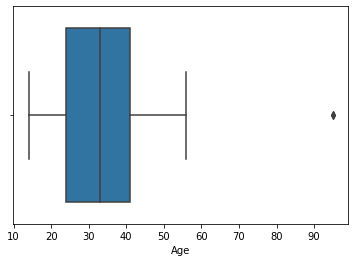

In [168]:
sns.boxplot(data=df,x='Age')
plt.show()

In [169]:
df=df[df['Age']<90]

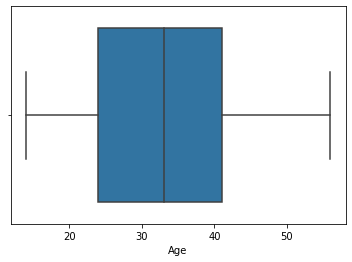

In [170]:
sns.boxplot(data=df,x='Age')
plt.show()

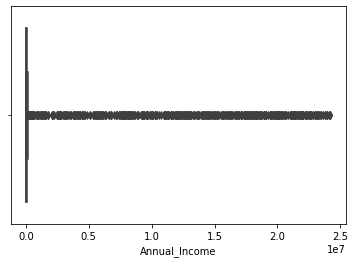

In [171]:
sns.boxplot(data=df,x='Annual_Income')
plt.show()

In [172]:
df['Annual_Income'].mean()

178048.30743173856

In [173]:
df[df['Annual_Income']>300000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
245,55.0,Scientist,586359.0,1684.168333,1,5,1,2.0,"Auto Loan, and Home Equity Loan",5,...,4.0,Good,413.32,28.836349,No,29.534584,68.956725,High_spent_Medium_value_payments,319.925525,Good
361,15.0,Entrepreneur,18334118.0,4369.482500,10,10,18,8.0,"Student Loan, Home Equity Loan, Payday Loan, D...",30,...,11.0,Bad,3422.49,36.729939,Yes,314.901785,124.541470,High_spent_Small_value_payments,257.504994,Standard
368,27.0,Architect,19717385.0,1057.435833,7,10,33,9.0,"Credit-Builder Loan, Personal Loan, Credit-Bui...",59,...,11.0,Bad,1510.00,25.314339,Yes,58.868441,60.550786,High_spent_Small_value_payments,246.324357,Standard
379,30.0,Teacher,2709655.0,7489.973333,2,6,8,2.0,"Auto Loan, and Payday Loan",2,...,0.0,Good,680.77,26.447282,No,121.682017,264.206674,Low_spent_Small_value_payments,653.108643,Standard
420,44.0,Developer,2592822.0,1012.480000,8,5,21,8.0,"Student Loan, Payday Loan, Personal Loan, Not ...",62,...,6.0,Bad,4071.62,26.429152,Yes,81.712655,190.000000,Low_spent_Small_value_payments,179.109536,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99260,23.0,Doctor,21337278.0,6539.666667,8,4,17,4.0,"Debt Consolidation Loan, Credit-Builder Loan, ...",27,...,6.0,Standard,1211.41,25.320687,Yes,210.592362,125.185293,High_spent_Large_value_payments,558.189011,Standard
99280,21.0,Manager,18721299.0,4071.000000,4,7,10,2.0,"Home Equity Loan, and Auto Loan",6,...,4.0,Standard,60.08,36.177998,No,92.208294,911.069475,Low_spent_Small_value_payments,8.941231,Standard
99432,26.0,Writer,6326812.0,3515.015000,6,7,16,5.0,"Personal Loan, Debt Consolidation Loan, Credit...",24,...,10.0,Bad,1680.53,39.859217,Yes,93.542536,126.461522,Low_spent_Medium_value_payments,411.497442,Poor
99664,31.0,Lawyer,5794377.0,4071.000000,5,4,9,1.0,Debt Consolidation Loan,3,...,1.0,Good,928.28,38.616320,No,72.250125,169.356592,High_spent_Large_value_payments,1210.848950,Standard


In [174]:
df=df[df['Annual_Income']<300000]

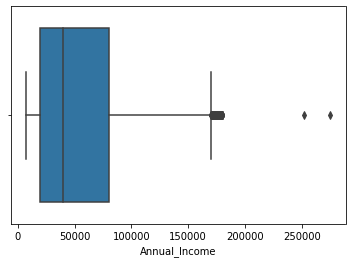

In [175]:
sns.boxplot(data=df,x='Annual_Income')
plt.show()

In [176]:
df[df['Annual_Income']>180000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
38421,45.0,Developer,275234.0,391.053333,7,10,25,5.0,"Payday Loan, Auto Loan, Debt Consolidation Loa...",22,...,17.0,Bad,3802.67,33.247101,Yes,21.845762,0.000000,High_spent_Small_value_payments,268.439243,Standard
70085,35.0,Accountant,251889.0,3024.923333,4,4,10,4.0,"Personal Loan, Credit-Builder Loan, Personal L...",6,...,2.0,Standard,1081.20,32.218224,Yes,60.846216,97.193219,High_spent_Medium_value_payments,394.452898,Standard


In [177]:
df=df[df['Annual_Income']<180000]

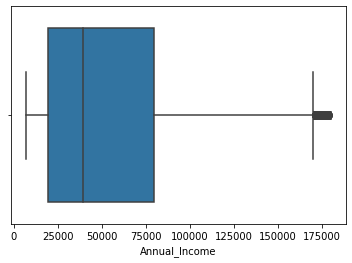

In [178]:
sns.boxplot(data=df,x='Annual_Income')
plt.show()

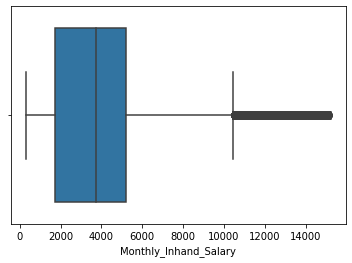

In [179]:
sns.boxplot(data=df,x='Monthly_Inhand_Salary')
plt.show()

In [180]:
df[df['Monthly_Inhand_Salary']>11000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
17,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",13,...,3.0,Good,1303.01,41.702573,No,246.992319,232.860384,High_spent_Small_value_payments,998.869297,Good
21,34.0,Engineer,143162.64,12187.220000,1,5,8,967.0,"Auto Loan, Auto Loan, and Not Specified",8,...,3.0,Good,1303.01,39.783993,No,246.992319,257.808099,High_spent_Medium_value_payments,963.921581,Good
22,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,...,3.0,Good,1303.01,38.068624,No,246.992319,263.174163,High_spent_Small_value_payments,968.555517,Standard
23,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,"Auto Loan, Auto Loan, and Not Specified",8,...,3.0,Good,1303.01,38.374753,No,246.992319,190.000000,High_spent_Small_value_payments,895.494583,Standard
48,33.0,Lawyer,131313.40,11242.783333,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,2.0,Good,352.16,32.200509,NM,137.644605,378.171254,High_spent_Medium_value_payments,858.462474,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99923,38.0,Media_Manager,139664.96,11777.746667,3,6,12,4.0,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,...,8.0,Standard,365.66,36.412347,Yes,423.731016,714.470516,Low_spent_Medium_value_payments,319.573135,Standard
99924,38.0,Media_Manager,139664.96,11777.746667,3,6,12,4.0,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,...,8.0,Standard,365.66,26.441638,NM,423.731016,314.407561,High_spent_Medium_value_payments,689.636090,Standard
99925,38.0,Media_Manager,139664.96,11777.746667,3,6,12,4.0,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,...,8.0,Standard,365.66,27.714375,Yes,423.731016,190.000000,Low_spent_Large_value_payments,182.547539,Standard
99926,38.0,Media_Manager,139664.96,11777.746667,3,6,12,4.0,"Credit-Builder Loan, Credit-Builder Loan, Stud...",14,...,9.0,Standard,365.66,32.102414,Yes,423.731016,378.289477,High_spent_Small_value_payments,635.754174,Good


In [181]:
df=df[df['Monthly_Inhand_Salary']<11000]

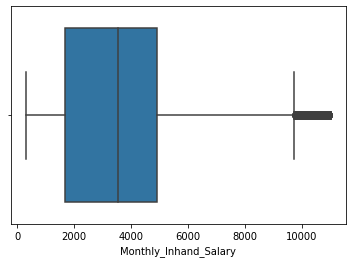

In [182]:
sns.boxplot(data=df,x='Monthly_Inhand_Salary')
plt.show()

In [183]:
df[df['Monthly_Inhand_Salary']>10000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
50,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,31.803134,NM,911.220179,188.064321,High_spent_Large_value_payments,1038.569407,Good
51,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,42.645785,No,23834.000000,337.434956,High_spent_Medium_value_payments,899.198772,Good
52,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,40.902517,No,32662.000000,263.378909,High_spent_Large_value_payments,963.254819,Good
55,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,29.187913,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,Good
565,18.0,Scientist,144546.72,10653.043108,0,3,7,2.0,"Payday Loan, and Not Specified",15,...,1.0,Good,1045.11,37.164043,No,1293.505449,415.183413,High_spent_Medium_value_payments,878.784031,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99633,24.0,Developer,125271.96,10374.330000,2,7,1,4.0,"Mortgage Loan, Debt Consolidation Loan, Mortga...",9,...,3.0,Good,827.56,26.199548,No,241.065885,388.657001,High_spent_Medium_value_payments,657.710113,Poor
99635,24.0,Developer,125271.96,10374.330000,2,7,1,4.0,"Mortgage Loan, Debt Consolidation Loan, Mortga...",9,...,3.0,Good,827.56,40.192635,No,241.065885,156.544668,High_spent_Large_value_payments,879.822447,Poor
99636,25.0,Developer,125271.96,10374.330000,2,7,1,4.0,"Mortgage Loan, Debt Consolidation Loan, Mortga...",9,...,3.0,Good,827.56,25.439413,No,241.065885,309.481379,Low_spent_Large_value_payments,756.885736,Poor
99637,25.0,Developer,125271.96,10374.330000,2,7,1,4.0,"Mortgage Loan, Debt Consolidation Loan, Mortga...",9,...,3.0,Good,827.56,30.231062,No,241.065885,192.114767,High_spent_Large_value_payments,844.252348,Poor


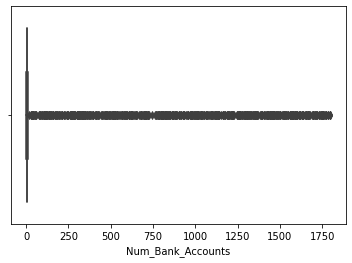

In [184]:
sns.boxplot(data=df,x='Num_Bank_Accounts')
plt.show()

In [185]:
df['Num_Bank_Accounts'].mean()

17.32352880038248

In [186]:
df[df['Num_Bank_Accounts']>30]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
267,44.0,Writer,58317.00,4071.000000,1414,5,9,6.0,"Mortgage Loan, Personal Loan, Home Equity Loan...",18,...,10.0,Standard,98.97,29.766107,Yes,149.897199,158.648276,High_spent_Medium_value_payments,407.929525,Standard
756,33.0,Musician,14205.09,1086.757500,91,10,21,8.0,"Student Loan, Not Specified, Not Specified, Cr...",36,...,16.0,Bad,4845.24,30.989504,Yes,49.032395,64.588050,Low_spent_Large_value_payments,265.055305,Standard
1122,26.0,Mechanic,77418.52,6450.543333,1696,9,20,7.0,"Credit-Builder Loan, Auto Loan, Student Loan, ...",34,...,6.0,Bad,3962.08,31.326327,Yes,339.031032,398.466651,Low_spent_Large_value_payments,177.556650,Poor
1245,34.0,Doctor,35376.32,2717.026667,649,3,19,3.0,"Personal Loan, Payday Loan, and Personal Loan",8,...,7.0,Standard,1166.47,35.676021,NM,58.216670,59.799002,High_spent_Small_value_payments,413.686995,Standard
1299,22.0,Entrepreneur,19283.47,1886.955833,889,8,34,9.0,"Home Equity Loan, Debt Consolidation Loan, Aut...",38,...,1839.0,Bad,4404.48,36.813214,Yes,84.616432,118.976263,Low_spent_Medium_value_payments,265.102889,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98901,19.0,Lawyer,43240.45,3608.448643,75,4,11,2.0,"Debt Consolidation Loan, and Payday Loan",6,...,3.0,Good,1320.52,35.503622,No,209.844564,129.416603,High_spent_Small_value_payments,467.398106,Good
99417,40.0,Teacher,16321.82,4071.000000,1525,10,23,7.0,"Personal Loan, Personal Loan, Home Equity Loan...",54,...,12.0,Bad,2686.37,32.112798,Yes,89.423165,68.238366,Low_spent_Small_value_payments,288.953635,Poor
99543,34.0,Scientist,34671.15,2637.262500,160,3,16,2.0,"Auto Loan, and Home Equity Loan",26,...,4.0,Standard,1071.97,22.558202,NM,49430.000000,121.648177,Low_spent_Large_value_payments,359.740484,Standard
99722,53.0,Architect,36817.94,3198.161667,697,4,5,3.0,"Home Equity Loan, Auto Loan, and Mortgage Loan",7,...,2.0,Good,1019.46,26.578799,No,86.809918,123.915559,Low_spent_Small_value_payments,399.090690,Standard


In [187]:
df=df[df['Num_Bank_Accounts']<30]

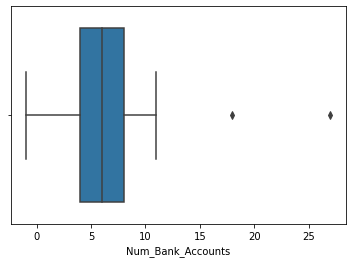

In [188]:
sns.boxplot(data=df,x='Num_Bank_Accounts')
plt.show()

In [189]:
df=df[df['Num_Bank_Accounts']<15]

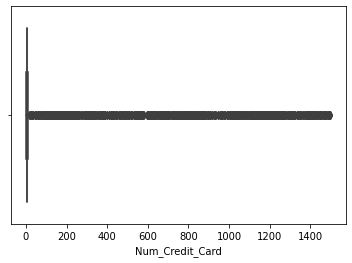

In [190]:
sns.boxplot(data=df,x='Num_Credit_Card')
plt.show()

In [191]:
df['Num_Credit_Card'].mean()

22.693532422130026

In [192]:
df[df['Num_Credit_Card']>40]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
343,42.0,Architect,20574.47,1740.539167,6,1189,14,4.0,"Credit-Builder Loan, Personal Loan, Credit-Bui...",6,...,11.0,Standard,749.95,28.629030,Yes,49.348666,190.000000,High_spent_Large_value_payments,322.737743,Standard
592,35.0,Media_Manager,72330.98,6300.581667,0,262,11,1.0,Auto Loan,1,...,1.0,Good,596.78,31.873842,No,31.379794,390.546201,Low_spent_Medium_value_payments,488.132172,Good
657,38.0,Journalist,31021.24,2756.103333,7,809,11,4.0,"Auto Loan, Auto Loan, Auto Loan, and Personal ...",13,...,4.0,Standard,852.81,33.894575,No,90.759178,58.538483,High_spent_Medium_value_payments,376.312672,Standard
758,34.0,Musician,177974.00,1086.757500,7,688,21,8.0,"Student Loan, Not Specified, Not Specified, Cr...",33,...,16.0,Bad,4845.24,32.717553,Yes,49.032395,90.167181,Low_spent_Small_value_payments,259.476174,Standard
1259,26.0,Entrepreneur,19853.35,1726.445833,7,1201,6,2.0,"Debt Consolidation Loan, and Home Equity Loan",21,...,2.0,Standard,816.46,33.435843,No,28.071965,123.796178,Low_spent_Large_value_payments,290.776440,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99434,26.0,Writer,177974.00,3515.015000,6,1180,16,5.0,"Personal Loan, Debt Consolidation Loan, Credit...",24,...,10.0,Bad,1680.53,30.236149,Yes,93.542536,190.000000,High_spent_Large_value_payments,437.983220,Poor
99470,34.0,Writer,14971.72,1546.643333,7,697,31,3.0,"Home Equity Loan, Home Equity Loan, and Debt C...",45,...,15.0,Standard,1618.30,24.599772,NM,27.406355,130.758708,Low_spent_Large_value_payments,266.499270,Standard
99520,42.0,Lawyer,40146.78,3194.565000,6,569,2372,5.0,"Mortgage Loan, Home Equity Loan, Student Loan,...",20,...,12.0,Bad,3539.88,26.838590,Yes,160.788151,186.368363,Low_spent_Small_value_payments,262.299986,Poor
99592,36.0,Writer,61167.90,4912.325000,3,1300,2,4.0,"Home Equity Loan, Mortgage Loan, Payday Loan, ...",10,...,3.0,Good,1354.88,27.281315,No,176.742422,191.324202,High_spent_Small_value_payments,383.165876,Good


In [193]:
df=df[df['Num_Credit_Card']<40]

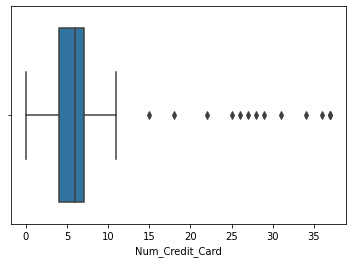

In [194]:
sns.boxplot(data=df,x='Num_Credit_Card')
plt.show()

In [195]:
df=df[df['Num_Credit_Card']<14]

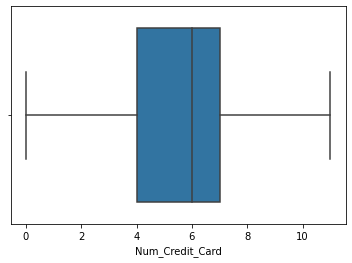

In [196]:
sns.boxplot(data=df,x='Num_Credit_Card')
plt.show()

In [197]:
df.shape

(46404, 22)

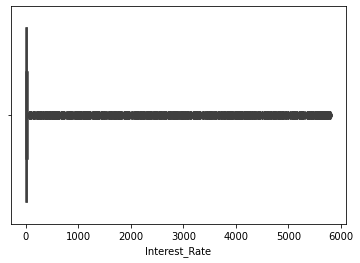

In [198]:
sns.boxplot(data=df,x='Interest_Rate')
plt.show()

In [199]:
df['Interest_Rate'].mean()

76.99573312645461

In [200]:
df[df['Interest_Rate']>2000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
472,45.0,Journalist,41746.760,3651.896667,8,5,5261,3.0,"Mortgage Loan, Personal Loan, and Not Specified",62,...,8.0,Bad,1936.79,37.705261,Yes,102.283398,425.103822,Low_spent_Small_value_payments,127.802447,Poor
766,28.0,Scientist,62320.560,5068.380000,9,9,3366,5.0,"Debt Consolidation Loan, Home Equity Loan, Aut...",23,...,15.0,Bad,3589.56,23.116437,Yes,171.345560,190.000000,High_spent_Small_value_payments,500.695439,Standard
770,25.0,Manager,43758.340,3454.528333,5,6,5565,2.0,"Personal Loan, and Payday Loan",18,...,2.0,Good,1194.28,26.011219,No,56.311421,190.000000,High_spent_Medium_value_payments,485.307354,Good
886,34.0,Engineer,19777.050,1728.087500,5,3,2199,3.0,"Student Loan, Debt Consolidation Loan, and Aut...",16,...,1.0,Good,186.16,24.626888,No,29.045533,178.201683,Low_spent_Medium_value_payments,245.561534,Poor
893,25.0,Musician,20188.020,1851.335000,4,3,2862,3.0,"Mortgage Loan, Student Loan, and Mortgage Loan",9,...,0.0,Good,399.92,37.289992,NM,25.580281,22.789935,High_spent_Medium_value_payments,386.763284,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98854,49.0,Media_Manager,65937.120,5465.760000,5,5,4430,2.0,"Payday Loan, and Auto Loan",22,...,1187.0,Good,1256.89,33.818695,No,87.375649,354.111789,High_spent_Small_value_payments,365.088562,Good
99090,44.0,Manager,12821.845,840.487083,7,6,2863,1.0,Credit-Builder Loan,12,...,2.0,Standard,1475.23,37.859174,No,10.211494,74.997945,Low_spent_Small_value_payments,288.839270,Standard
99119,27.0,Media_Manager,80288.080,6961.673333,7,10,4962,6.0,"Home Equity Loan, Payday Loan, Personal Loan, ...",15,...,8.0,Bad,2848.95,37.569531,Yes,400.593501,189.686614,High_spent_Medium_value_payments,355.887218,Standard
99542,34.0,Scientist,34671.150,4071.000000,4,3,4017,2.0,"Auto Loan, and Home Equity Loan",26,...,4.0,Standard,1071.97,23.601680,Yes,52.337589,91.218036,High_spent_Small_value_payments,380.170625,Standard


In [201]:
df=df[df['Interest_Rate']<2000]

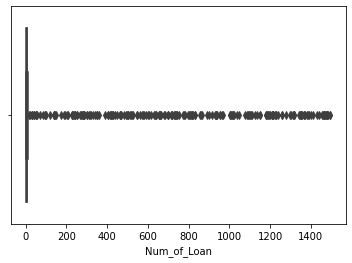

In [202]:
sns.boxplot(data=df,x='Num_of_Loan')
plt.show()

In [203]:
df['Num_of_Loan'].mean()

7.545031361321765

In [204]:
df[df['Num_of_Loan']>15]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2008,21.0,Accountant,31069.320,2361.110000,2,3,12,352.0,"Auto Loan, and Student Loan",14,...,2.0,Good,343.60,36.403191,No,34.168604,139.087148,Low_spent_Medium_value_payments,342.855248,Good
2289,23.0,Manager,47275.960,4238.663333,6,3,4,1017.0,"Payday Loan, Auto Loan, Personal Loan, and Cre...",18,...,2.0,Good,302.10,34.883541,No,121.928877,469.732373,Low_spent_Small_value_payments,122.205083,Good
2319,45.0,Lawyer,7599.035,898.252917,7,9,27,146.0,"Personal Loan, Payday Loan, Home Equity Loan, ...",35,...,7.0,Bad,2198.82,36.257290,Yes,29.395522,67.994181,Low_spent_Large_value_payments,262.435588,Poor
2578,46.0,Lawyer,50847.220,4156.268333,3,6,17,341.0,Credit-Builder Loan,6,...,0.0,Standard,486.71,29.981923,NM,23.783878,54.531348,High_spent_Large_value_payments,577.311607,Standard
2811,41.0,Musician,16582.830,1157.902500,4,7,14,720.0,"Credit-Builder Loan, Student Loan, Credit-Buil...",19,...,10.0,Standard,471.81,23.914342,Yes,52.024924,44.936013,Low_spent_Small_value_payments,308.829313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99058,27.0,Mechanic,36772.660,2925.388333,1,4,4,657.0,"Not Specified, Personal Loan, and Auto Loan",7,...,27.0,Good,418.16,24.847956,No,67.835151,366.939502,Low_spent_Small_value_payments,147.764181,Standard
99451,45.0,Developer,39800.360,3097.696667,8,10,21,41.0,"Mortgage Loan, Payday Loan, Debt Consolidation...",30,...,8.0,Bad,4241.52,31.600774,NM,252.255601,110.257403,High_spent_Small_value_payments,207.256662,Standard
99743,23.0,Scientist,18940.820,1281.401667,9,5,33,192.0,"Debt Consolidation Loan, Payday Loan, Not Spec...",49,...,17.0,Bad,1327.42,36.038114,Yes,87.857445,44.626674,High_spent_Small_value_payments,255.656047,Poor
99853,40.0,Scientist,81093.160,7017.763333,10,7,17,349.0,"Auto Loan, Payday Loan, Auto Loan, Student Loa...",29,...,12.0,Bad,4523.30,35.925627,NM,409.039442,314.580409,Low_spent_Medium_value_payments,258.156482,Standard


In [205]:
df=df[df['Num_of_Loan']<15]

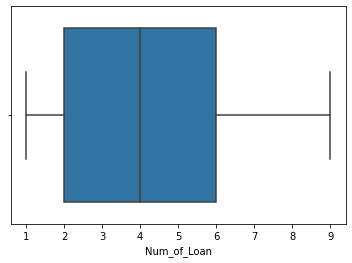

In [206]:
sns.boxplot(data=df,x='Num_of_Loan')
plt.show()

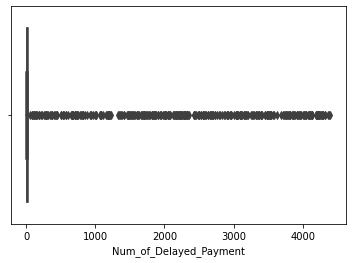

In [207]:
sns.boxplot(data=df,x='Num_of_Delayed_Payment')
plt.show()

In [208]:
df['Num_of_Delayed_Payment'].mean()

31.6466700335961

In [209]:
df[df['Num_of_Delayed_Payment']>60]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
252,43.0,Musician,18627.640,4071.000000,7,7,19,6.0,"Payday Loan, Not Specified, Student Loan, Cred...",31,...,7.0,Bad,1793.54,25.585205,Yes,65.139488,24.346188,High_spent_Large_value_payments,289.244657,Poor
304,36.0,Musician,15566.020,1423.168333,8,5,32,4.0,"Home Equity Loan, Credit-Builder Loan, Persona...",16,...,7.0,Standard,1693.95,37.409934,Yes,43.070520,65.986586,Low_spent_Small_value_payments,323.259728,Poor
643,47.0,Accountant,17787.340,1242.278333,8,4,16,2.0,"Student Loan, and Auto Loan",6,...,0.0,Standard,730.90,34.903092,NM,20.063634,28.516044,High_spent_Medium_value_payments,325.648156,Standard
706,18.0,Developer,27070.070,2518.839167,7,3,11,4.0,"Home Equity Loan, Credit-Builder Loan, Student...",17,...,6.0,Standard,919.76,29.830652,No,73.233318,104.181104,High_spent_Medium_value_payments,324.469494,Standard
1212,31.0,Accountant,59971.420,5190.618333,8,5,6,3.0,"Debt Consolidation Loan, Home Equity Loan, and...",12,...,4.0,Standard,203.03,30.371064,No,107.937241,171.767829,High_spent_Small_value_payments,499.356763,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98733,38.0,Accountant,23737.090,4071.000000,4,5,11,3.0,"Student Loan, Home Equity Loan, and Not Specified",20,...,6.0,Standard,91.78,29.275773,Yes,47.141829,190.000000,Low_spent_Large_value_payments,348.047419,Standard
99133,31.0,Lawyer,77633.040,6635.420000,7,5,34,5.0,"Payday Loan, Credit-Builder Loan, Student Loan...",55,...,8.0,Bad,3392.65,32.025465,Yes,227.777065,106.015126,High_spent_Large_value_payments,569.749810,Poor
99402,27.0,Mechanic,8968.555,880.379583,10,8,30,8.0,"Credit-Builder Loan, Auto Loan, Mortgage Loan,...",58,...,12.0,Bad,2502.86,38.044111,Yes,57.078833,93.647887,Low_spent_Small_value_payments,227.311238,Poor
99562,28.0,Lawyer,177974.000,1879.298333,7,3,16,2.0,"Credit-Builder Loan, and Student Loan",14,...,4.0,Standard,68.06,40.940335,No,23.498319,33.192490,High_spent_Small_value_payments,391.239024,Standard


In [210]:
df=df[df['Num_of_Delayed_Payment']<60]

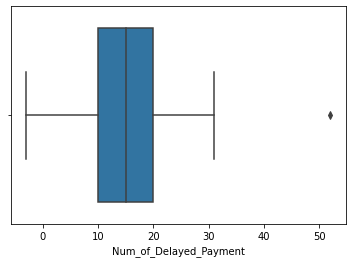

In [211]:
sns.boxplot(data=df,x='Num_of_Delayed_Payment')
plt.show()

In [212]:
df=df[df['Num_of_Delayed_Payment']<50]

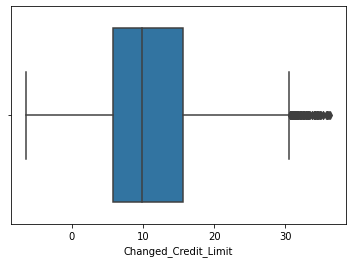

In [213]:
sns.boxplot(data=df,x='Changed_Credit_Limit')
plt.show()

In [214]:
df[df['Changed_Credit_Limit']>30]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
682,17.0,Manager,14841.35,1437.779167,6,5,17,7.0,"Mortgage Loan, Not Specified, Credit-Builder L...",64,...,6.0,Bad,3865.15,23.948611,Yes,71.544743,171.086258,Low_spent_Small_value_payments,191.146916,Standard
1478,34.0,Mechanic,177974.00,6955.293333,6,9,27,8.0,"Not Specified, Payday Loan, Home Equity Loan, ...",26,...,10.0,Bad,4525.08,38.018603,Yes,363.237312,258.666549,Low_spent_Small_value_payments,363.625473,Standard
2136,35.0,Teacher,55719.18,4689.265000,8,7,18,5.0,"Auto Loan, Home Equity Loan, Auto Loan, Home E...",36,...,6.0,Bad,4090.50,33.561959,Yes,130.468403,199.391589,High_spent_Small_value_payments,399.066507,Poor
2898,31.0,Manager,82700.32,6625.693333,8,8,17,6.0,"Auto Loan, Payday Loan, Credit-Builder Loan, D...",19,...,12.0,Bad,4659.60,25.570053,Yes,392.114333,331.480753,High_spent_Small_value_payments,198.974247,Poor
2976,41.0,Lawyer,177974.00,896.089583,6,8,19,5.0,"Mortgage Loan, Credit-Builder Loan, Home Equit...",36,...,11.0,Bad,2758.61,36.025072,Yes,31.954490,19.513402,High_spent_Large_value_payments,278.141066,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95819,26.0,Manager,16750.04,1435.836667,9,10,27,6.0,"Auto Loan, Personal Loan, Credit-Builder Loan,...",41,...,12.0,Bad,4305.22,36.685553,Yes,82.578857,66.417174,Low_spent_Medium_value_payments,274.587636,Standard
96842,35.0,Entrepreneur,44378.19,4071.000000,8,7,22,7.0,"Personal Loan, Personal Loan, Auto Loan, Not S...",58,...,12.0,Bad,4117.61,33.764099,Yes,185.494510,253.392959,High_spent_Small_value_payments,219.730781,Poor
96846,35.0,Entrepreneur,44378.19,3986.182500,8,7,22,7.0,"Personal Loan, Personal Loan, Auto Loan, Not S...",58,...,12.0,Bad,4117.61,27.171360,Yes,185.494510,136.163468,High_spent_Medium_value_payments,326.960272,Poor
98623,24.0,Mechanic,81842.52,6733.210000,6,6,18,7.0,"Home Equity Loan, Payday Loan, Payday Loan, No...",50,...,12.0,Bad,3127.09,39.965640,NM,322.076599,122.316876,High_spent_Medium_value_payments,478.927525,Standard


In [215]:
df=df[df['Changed_Credit_Limit']<30]

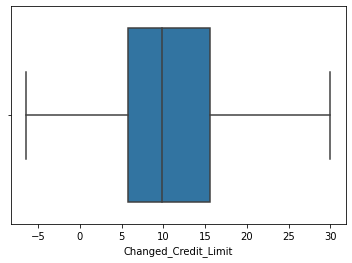

In [216]:
sns.boxplot(data=df,x='Changed_Credit_Limit')
plt.show()

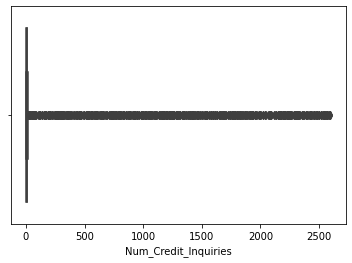

In [217]:
sns.boxplot(data=df,x='Num_Credit_Inquiries')
plt.show()

In [218]:
df['Num_Credit_Inquiries'].mean()

28.046309856654684

In [219]:
df[df['Num_Credit_Inquiries']>60]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
193,34.0,Mechanic,57983.120,4071.000000,9,8,31,8.0,"Payday Loan, Not Specified, Credit-Builder Loa...",53,...,1044.0,Bad,3532.83,37.873642,Yes,200.432613,193.873375,High_spent_Medium_value_payments,327.786678,Standard
198,34.0,Mechanic,57983.120,4720.926667,9,8,31,8.0,"Payday Loan, Not Specified, Credit-Builder Loa...",49,...,1936.0,Bad,3532.83,24.631497,Yes,200.432613,234.732040,Low_spent_Medium_value_payments,316.928013,Standard
234,37.0,Manager,39641.540,3007.461667,10,8,25,6.0,"Auto Loan, Student Loan, Payday Loan, Payday L...",61,...,568.0,Bad,2258.73,27.572863,Yes,172.382527,198.042123,High_spent_Small_value_payments,190.321516,Poor
312,18.0,Developer,66567.320,5800.276667,5,7,5,2.0,"Mortgage Loan, and Not Specified",7,...,1618.0,Standard,233.79,34.456272,No,37602.000000,251.647422,Low_spent_Small_value_payments,518.190884,Standard
503,34.0,Musician,88362.460,4071.000000,5,2,8,3.0,"Debt Consolidation Loan, Home Equity Loan, and...",15,...,1251.0,Good,325.93,36.538963,No,211.184390,80.071346,High_spent_Large_value_payments,674.298097,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98974,38.0,Architect,62661.540,5053.795000,5,5,12,1.0,Personal Loan,11,...,118.0,Good,466.20,37.104222,No,32.721131,188.393392,High_spent_Medium_value_payments,534.264977,Good
99043,40.0,Entrepreneur,105931.170,8672.597500,8,7,11,5.0,"Mortgage Loan, Auto Loan, Mortgage Loan, Stude...",25,...,2228.0,Standard,254.06,36.064448,Yes,392.842437,102.000294,High_spent_Large_value_payments,612.417019,Standard
99152,29.0,Scientist,41398.440,3749.870000,8,7,13,6.0,"Auto Loan, Payday Loan, Payday Loan, Mortgage ...",25,...,1801.0,Standard,1701.88,29.506673,Yes,182.976649,195.529273,Low_spent_Large_value_payments,266.481077,Standard
99502,29.0,Engineer,16285.675,1300.139583,4,3,6,5.0,"Auto Loan, Payday Loan, Personal Loan, Student...",26,...,2072.0,Standard,295.08,28.076528,Yes,48.844132,135.936585,Low_spent_Small_value_payments,235.233241,Standard


In [220]:
df=df[df['Num_Credit_Inquiries']<60]

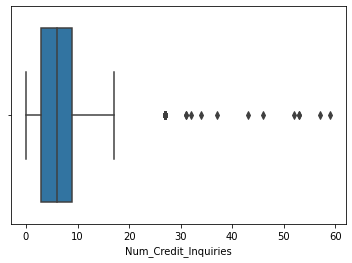

In [221]:
sns.boxplot(data=df,x='Num_Credit_Inquiries')
plt.show()

In [222]:
df=df[df['Num_Credit_Inquiries']<20]

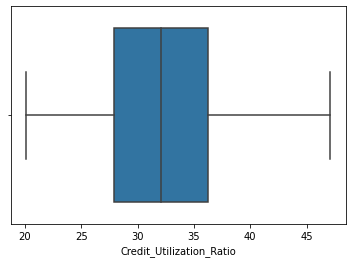

In [223]:
sns.boxplot(data=df,x='Credit_Utilization_Ratio')
plt.show()

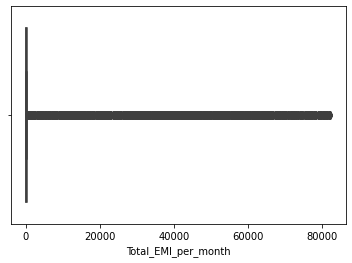

In [224]:
sns.boxplot(data=df,x='Total_EMI_per_month')
plt.show()

In [225]:
df['Total_EMI_per_month'].mean()

1365.960936799798

In [226]:
df[df['Total_EMI_per_month']>8000]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
51,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,42.645785,No,23834.0,337.434956,High_spent_Medium_value_payments,899.198772,Good
52,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,40.902517,No,32662.0,263.378909,High_spent_Large_value_payments,963.254819,Good
250,43.0,Musician,18627.64,4071.000000,7,7,19,6.0,"Payday Loan, Not Specified, Student Loan, Cred...",31,...,7.0,Bad,1793.54,27.197209,Yes,31551.0,105.149150,Low_spent_Small_value_payments,258.441696,Poor
383,30.0,Teacher,87215.68,7489.973333,2,6,8,2.0,"Auto Loan, and Payday Loan",2,...,0.0,Good,680.77,35.622883,NM,19734.0,304.202810,High_spent_Medium_value_payments,573.112506,Good
440,22.0,Entrepreneur,36822.29,3132.524167,8,7,6,4.0,"Not Specified, Personal Loan, Credit-Builder L...",14,...,4.0,Standard,125.25,26.612872,No,81441.0,121.408376,Low_spent_Small_value_payments,386.043328,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99737,23.0,Scientist,18940.82,1281.401667,9,5,33,6.0,"Debt Consolidation Loan, Payday Loan, Not Spec...",49,...,12.0,Bad,1327.42,23.562713,NM,49650.0,38.307620,Low_spent_Medium_value_payments,281.975102,Poor
99903,34.0,Entrepreneur,41329.56,3421.130000,2,3,7,1.0,Not Specified,2,...,2.0,Good,1245.01,39.866030,No,81751.0,92.127237,High_spent_Medium_value_payments,479.432186,Good
99960,18.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,Not Specified,14,...,1.0,Good,1079.48,27.289440,No,50894.0,78.514945,High_spent_Small_value_payments,493.341182,Good
99985,28.0,Architect,20002.88,1929.906667,10,8,29,5.0,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,...,9.0,Bad,1510.00,39.772607,Yes,12112.0,148.275233,Low_spent_Small_value_payments,273.750662,Poor


In [227]:
df=df[df['Total_EMI_per_month']<8000]

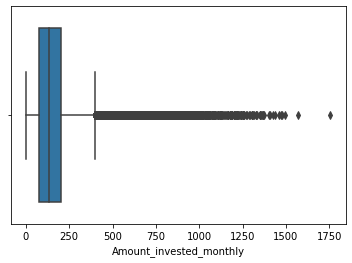

In [228]:
sns.boxplot(data=df,x='Amount_invested_monthly')
plt.show()

In [229]:
df[df['Amount_invested_monthly']>800]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
55,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,29.187913,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,Good
651,42.0,Teacher,103353.06,8527.755000,3,3,6,1.0,Student Loan,4,...,2.0,Good,1374.56,23.170845,No,64.001686,1043.873612,Low_spent_Small_value_payments,34.900203,Good
1091,44.0,Journalist,126006.68,4071.000000,4,3,20,3.0,"Personal Loan, Home Equity Loan, and Debt Cons...",9,...,0.0,Standard,385.80,28.671553,Yes,239.767329,1082.820731,Low_spent_Medium_value_payments,26.767607,Standard
1096,49.0,Developer,102885.32,8643.776667,3,5,16,1.0,Personal Loan,11,...,4.0,Standard,605.34,22.393679,Yes,74.158664,857.763222,Low_spent_Small_value_payments,222.455781,Standard
1444,32.0,Manager,131577.84,4071.000000,2,3,3,2.0,"Credit-Builder Loan, and Personal Loan",11,...,2.0,Good,816.21,30.592040,No,185.412196,988.994679,Low_spent_Medium_value_payments,226.175125,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99045,40.0,Entrepreneur,105931.17,8672.597500,8,7,11,5.0,"Mortgage Loan, Auto Loan, Mortgage Loan, Stude...",29,...,4.0,Standard,254.06,34.520290,Yes,392.842437,1013.737765,Low_spent_Small_value_payments,383.000000,Good
99232,24.0,Media_Manager,127313.40,10634.450000,4,4,5,1.0,Personal Loan,14,...,2.0,Good,1075.47,35.971414,No,101.118773,842.233552,Low_spent_Small_value_payments,410.092675,Good
99388,37.0,Doctor,96048.00,8139.000000,3,4,6,2.0,"Home Equity Loan, and Payday Loan",8,...,1.0,Good,875.35,33.578631,No,156.926470,894.690116,Low_spent_Small_value_payments,52.283414,Good
99604,38.0,Writer,126514.72,10341.893333,8,7,5,3.0,"Credit-Builder Loan, Home Equity Loan, and Aut...",21,...,0.0,Standard,1510.00,24.720156,No,312.032853,804.418057,Low_spent_Small_value_payments,207.738423,Good


In [230]:
df=df[df['Amount_invested_monthly']<800]

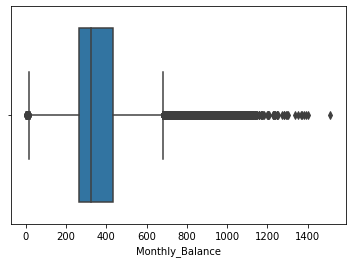

In [231]:
sns.boxplot(data=df,x='Monthly_Balance')
plt.show()

In [232]:
df[df['Monthly_Balance']>900]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
50,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,"Credit-Builder Loan, and Mortgage Loan",0,...,4.0,Good,352.16,31.803134,NM,911.220179,188.064321,High_spent_Large_value_payments,1038.569407,Good
655,42.0,Teacher,103353.06,8527.755000,3,3,6,1.0,Student Loan,4,...,2.0,Good,1374.56,41.837065,No,64.001686,67.105768,High_spent_Large_value_payments,961.668046,Good
667,36.0,Journalist,177974.00,4071.000000,8,5,15,2.0,"Mortgage Loan, and Mortgage Loan",9,...,3.0,Standard,668.14,31.933756,Yes,662.777741,190.000000,High_spent_Large_value_payments,1103.544143,Good
668,36.0,Journalist,134978.24,10541.520750,8,5,15,2.0,"Mortgage Loan, and Mortgage Loan",9,...,3.0,Standard,668.14,41.617974,Yes,662.777741,148.887507,High_spent_Medium_value_payments,1061.919336,Good
1270,33.0,Writer,115643.01,9910.917500,3,7,2,3.0,"Not Specified, Student Loan, and Not Specified",18,...,1.0,Good,951.36,34.281014,No,195.394009,116.463913,High_spent_Medium_value_payments,929.233828,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99482,44.0,Manager,145282.24,4071.000000,5,7,10,1.0,Student Loan,31,...,4.0,Good,1417.24,42.136969,No,104.351443,227.884681,High_spent_Large_value_payments,1123.249209,Poor
99632,24.0,Developer,125271.96,10374.330000,2,7,1,4.0,"Mortgage Loan, Debt Consolidation Loan, Mortga...",10,...,3.0,Good,827.56,35.958050,No,241.065885,119.134659,High_spent_Large_value_payments,917.232456,Poor
99639,25.0,Developer,125271.96,10374.330000,2,7,1,4.0,"Mortgage Loan, Debt Consolidation Loan, Mortga...",9,...,7.0,Good,827.56,32.497065,No,241.065885,99.100993,High_spent_Large_value_payments,937.266122,Poor
99669,31.0,Lawyer,146310.68,4071.000000,5,4,9,1.0,Debt Consolidation Loan,5,...,6.0,Good,928.28,33.148339,No,72.250125,477.463230,High_spent_Medium_value_payments,912.742312,Standard


In [233]:
df=df[df['Monthly_Balance']<900]

In [234]:
df.shape

(41006, 22)

In [235]:
df[df['Num_Bank_Accounts']==-1]

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30331,40.0,Engineer,128305.76,4071.000000,-1,6,1,2.0,"Auto Loan, and Not Specified",5,...,6.0,Good,1510.00,39.369401,No,196.587321,524.304418,Low_spent_Large_value_payments,592.522928,Good
47215,36.0,Lawyer,22312.07,2013.339167,-1,3,4,3.0,"Home Equity Loan, Debt Consolidation Loan, and...",9,...,3.0,Good,51.37,30.059211,No,32.891186,23.003094,High_spent_Medium_value_payments,395.439637,Good
55639,41.0,Developer,30352.11,2317.342500,-1,4,7,1.0,Student Loan,8,...,0.0,Good,644.57,32.937399,No,16.483566,89.622962,High_spent_Medium_value_payments,375.627721,Standard


In [236]:
df=df[df['Num_Bank_Accounts']!=-1]

In [237]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000,41003.000000
mean,32.784772,52885.741904,3649.518393,5.648684,5.706022,22.752140,4.073946,22.561959,15.171500,10.919641,6.271248,1552.957976,32.029323,121.913497,169.113927,361.408616
std,10.659175,45310.656202,2298.116270,2.545782,2.089694,96.870737,2.226930,15.385798,7.372376,6.885973,3.903328,1197.759279,5.010122,268.587923,139.658056,155.100145
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,1.000000,-5.000000,-3.000000,-6.440000,0.000000,0.230000,20.244130,4.462837,0.000000,0.088628
25%,24.000000,18921.780000,1662.537083,4.000000,4.000000,8.000000,2.000000,11.000000,10.000000,5.800000,3.000000,637.810000,27.857111,38.511683,71.808856,264.166915
50%,33.000000,36753.320000,3401.916667,6.000000,6.000000,15.000000,4.000000,19.000000,15.000000,9.880000,6.000000,1288.310000,32.034586,72.421755,132.157645,322.018974
75%,41.000000,70976.460000,4740.193333,8.000000,7.000000,22.000000,6.000000,29.000000,20.000000,15.720000,9.000000,2202.350000,36.237832,150.597743,197.839696,423.675071
max,56.000000,177974.000000,10998.177500,11.000000,11.000000,1972.000000,9.000000,67.000000,31.000000,29.980000,17.000000,4998.070000,44.349056,7971.000000,799.569152,899.888886


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41003 entries, 1 to 99998
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       41003 non-null  float64
 1   Occupation                41003 non-null  object 
 2   Annual_Income             41003 non-null  float64
 3   Monthly_Inhand_Salary     41003 non-null  float64
 4   Num_Bank_Accounts         41003 non-null  int64  
 5   Num_Credit_Card           41003 non-null  int64  
 6   Interest_Rate             41003 non-null  int64  
 7   Num_of_Loan               41003 non-null  float64
 8   Type_of_Loan              41003 non-null  object 
 9   Delay_from_due_date       41003 non-null  int64  
 10  Num_of_Delayed_Payment    41003 non-null  float64
 11  Changed_Credit_Limit      41003 non-null  float64
 12  Num_Credit_Inquiries      41003 non-null  float64
 13  Credit_Mix                41003 non-null  object 
 14  Outsta

In [239]:
df['Occupation'].nunique()

15

In [240]:
df['Occupation'].value_counts()

Lawyer           2999
Mechanic         2838
Scientist        2832
Teacher          2810
Architect        2804
Engineer         2777
Entrepreneur     2751
Doctor           2733
Accountant       2699
Developer        2692
Media_Manager    2650
Journalist       2626
Writer           2606
Manager          2596
Musician         2590
Name: Occupation, dtype: int64

In [241]:
df['Type_of_Loan'].nunique()

6165

In [242]:
df['Type_of_Loan'].value_counts()

Personal Loan                                                                                                570
Not Specified                                                                                                567
Student Loan                                                                                                 553
Debt Consolidation Loan                                                                                      529
Credit-Builder Loan                                                                                          511
                                                                                                            ... 
Credit-Builder Loan, Payday Loan, Credit-Builder Loan, Home Equity Loan, Not Specified, and Personal Loan      1
Credit-Builder Loan, Payday Loan, and Debt Consolidation Loan                                                  1
Student Loan, Mortgage Loan, Credit-Builder Loan, and Debt Consolidation Loan                   

In [243]:
df['Credit_Mix'].nunique()

3

In [244]:
df['Credit_Mix'].value_counts()

Standard    19358
Bad         11548
Good        10097
Name: Credit_Mix, dtype: int64

In [245]:
df['Payment_of_Min_Amount'].nunique()

3

In [246]:
df['Payment_of_Min_Amount'].value_counts()

Yes    23872
No     12225
NM      4906
Name: Payment_of_Min_Amount, dtype: int64

In [247]:
df['Payment_Behaviour'].nunique()

6

In [248]:
df['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      11788
High_spent_Medium_value_payments     7847
Low_spent_Medium_value_payments      5962
High_spent_Large_value_payments      5443
High_spent_Small_value_payments      5190
Low_spent_Large_value_payments       4773
Name: Payment_Behaviour, dtype: int64

In [249]:
df['Credit_Score'].nunique()

3

In [250]:
df['Credit_Score'].value_counts()

Standard    21645
Poor        13270
Good         6088
Name: Credit_Score, dtype: int64

In [251]:
cols=['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

In [252]:
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [253]:
df.sample(4)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
239,38.0,39641.54,3007.461667,10,8,25,6.0,"Auto Loan, Student Loan, Payday Loan, Payday L...",61,13.0,...,0,0,0,0,1,0,0,1,0,0
93,33.0,88640.24,7266.686667,3,6,1,2.0,"Payday Loan, and Payday Loan",4,0.0,...,0,1,0,1,0,0,0,0,0,1
26387,30.0,35989.50,3039.125000,7,6,26,7.0,"Mortgage Loan, Payday Loan, Credit-Builder Loa...",14,20.0,...,0,0,1,0,1,0,0,0,0,1
6238,37.0,20651.43,4071.000000,10,5,22,4.0,"Payday Loan, Payday Loan, Student Loan, and Au...",23,20.0,...,0,0,0,0,1,0,0,0,0,1


In [254]:
df=df.drop('Type_of_Loan',axis='columns')

In [255]:
le=LabelEncoder()

In [256]:
df['Credit_Score']=le.fit_transform(df['Credit_Score'])

In [257]:
df['Credit_Score'].value_counts()

2    21645
1    13270
0     6088
Name: Credit_Score, dtype: int64

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41003 entries, 1 to 99998
Data columns (total 40 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 41003 non-null  float64
 1   Annual_Income                                       41003 non-null  float64
 2   Monthly_Inhand_Salary                               41003 non-null  float64
 3   Num_Bank_Accounts                                   41003 non-null  int64  
 4   Num_Credit_Card                                     41003 non-null  int64  
 5   Interest_Rate                                       41003 non-null  int64  
 6   Num_of_Loan                                         41003 non-null  float64
 7   Delay_from_due_date                                 41003 non-null  int64  
 8   Num_of_Delayed_Payment                              41003 non-null  float64


In [259]:
X=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']

In [260]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)

In [261]:
y_sm.value_counts()

0    21645
2    21645
1    13270
Name: Credit_Score, dtype: int64

In [262]:
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X_sm,y_sm)

In [263]:
y_sm.value_counts()

0    21645
2    21645
1    21645
Name: Credit_Score, dtype: int64

In [264]:
X_sm.shape

(64935, 39)

In [265]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

In [266]:
y_train.value_counts()

0    17316
1    17316
2    17316
Name: Credit_Score, dtype: int64

In [267]:
y_test.value_counts()

2    4329
0    4329
1    4329
Name: Credit_Score, dtype: int64

In [268]:
X_train.shape

(51948, 39)

In [269]:
X_test.shape

(12987, 39)

In [270]:
scaler=MinMaxScaler()

In [271]:
X_train_scaled=scaler.fit_transform(X_train)

In [272]:
X_test_scaled=scaler.transform(X_test)

In [273]:
X_train_scaled

array([[0.95238095, 0.13442808, 0.22903593, ..., 1.        , 0.        ,
        0.        ],
       [0.14029319, 0.15935413, 0.25465783, ..., 0.        , 0.        ,
        0.        ],
       [0.36761907, 1.        , 0.11491995, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14285714, 0.21698302, 0.29104776, ..., 0.        , 0.        ,
        0.        ],
       [0.0952381 , 0.07088881, 0.10605112, ..., 0.        , 0.        ,
        1.        ],
       [0.07142857, 0.24709129, 0.35790085, ..., 1.        , 0.        ,
        0.        ]])

In [274]:
X_test_scaled

array([[0.33333333, 0.21092241, 0.29784118, ..., 0.        , 0.        ,
        0.        ],
       [0.26190476, 0.59482521, 0.35226923, ..., 0.        , 1.        ,
        0.        ],
       [0.97619048, 1.        , 0.35226923, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57142857, 0.37554477, 0.50920426, ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.31932763, 0.46844098, ..., 0.        , 0.        ,
        0.        ],
       [0.61904762, 0.12326183, 0.16834237, ..., 0.        , 0.        ,
        0.        ]])

In [330]:
model=RandomForestClassifier()

In [343]:
param_grid={'n_estimators':[80,100,120],'max_depth':[8,12,16],'max_features':['sqrt','log2']}

In [344]:
grid=GridSearchCV(estimator=model,param_grid=param_grid)

In [345]:
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 12, 16],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [80, 100, 120]})

In [346]:
grid.best_params_

{'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 120}

In [347]:
y_pred[:10]

array([1, 0, 2, 1, 0, 0, 2, 1, 1, 1])

In [348]:
y_test[:10]

13477    2
9184     0
32323    2
58029    1
53933    0
56063    0
11824    2
60909    1
20492    1
8583     1
Name: Credit_Score, dtype: int32

In [349]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4723
           1       0.86      0.83      0.84      4521
           2       0.72      0.84      0.78      3743

    accuracy                           0.84     12987
   macro avg       0.84      0.84      0.84     12987
weighted avg       0.85      0.84      0.84     12987



In [351]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[4031,  226,  466],
       [  58, 3737,  726],
       [ 240,  366, 3137]], dtype=int64)

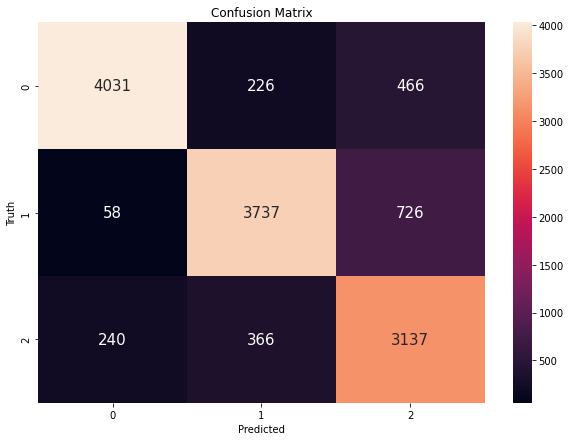

In [357]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,annot_kws={'size':15},fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()